# Task 2. Julia set

$z_{n+1} = z_{n}^2 + c$

In [1]:
import numpy as np
import random

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.animation import FuncAnimation
from PIL import Image

### Implement the map, plot the evolution of x

In [2]:
def z_next(x, y, c):
    z = complex(x, y)
    for i in range(100):
        z = pow(z, 2) + c
        if abs(z) > 10000:
            return i
    return 100

def z_next_mand(x, y):
    c = complex(x, y)
    z = 0
    for i in range(100):
        z = pow(z, 2) + c
        if abs(z) > 10000:
            return i
    return 100

### Plot the Julia set

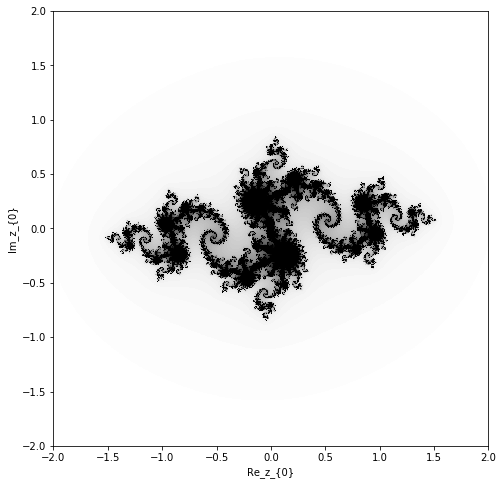

In [3]:
c = complex(-0.8, 0.156)
x = y = np.arange(-2.0, 2.0, 0.005)
Z = np.ndarray(shape=[len(x), len(y)])

for i, y_0 in enumerate(y):
    for j, x_0 in enumerate(x):
        Z[j][i] = z_next(x_0, y_0, c)

plt.figure(figsize=(8, 8))
plt.imshow(Z.T, cmap=cm.binary, extent=[-2, 2, -2, 2])
plt.xlabel('Re_z_{0}')
plt.ylabel('Im_z_{0}')
plt.show()

### C=0 - Mandelbrot set

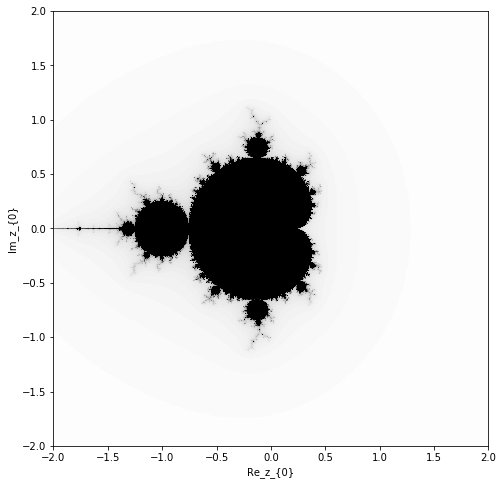

In [4]:
x = y = np.arange(-2.0, 2.0, 0.005)
Z = np.ndarray(shape=[len(x), len(y)])

for i, y_0 in enumerate(y):
    for j, x_0 in enumerate(x):
        Z[j][i] = z_next_mand(x_0, y_0)
    
plt.figure(figsize=(8, 8))
plt.xlabel('Re_z_{0}')
plt.ylabel('Im_z_{0}')
plt.imshow(Z.T, cmap=cm.binary, extent=[-2, 2, -2, 2])
plt.show()

### 3. Generate figure of Julia set (c = 1-r) where r is the golden ratio. Label the axes (Re(z0), Im(z0)), fontsize should be 20, figsize = (14,11)

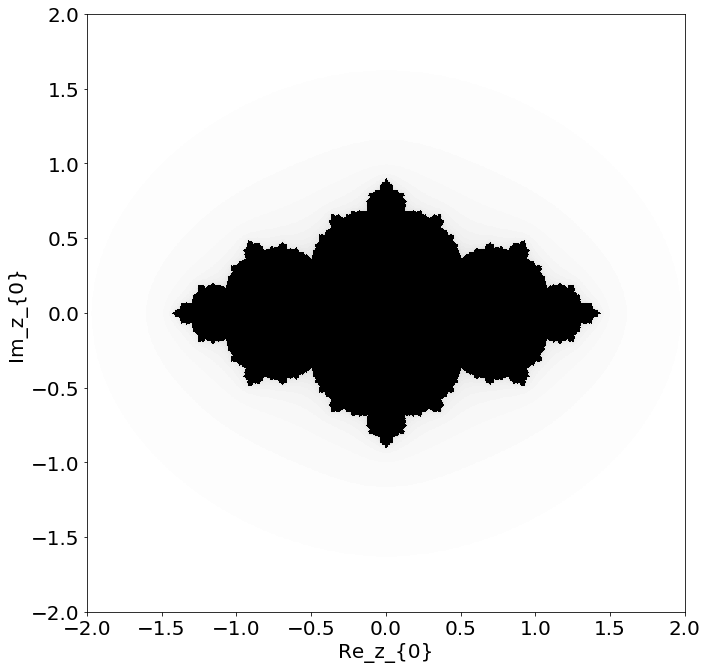

In [5]:
r = (1 + 5**0.5) / 2   # golden ratio
c = complex(1 - r, 0)
x = y = np.arange(-2.0, 2.0, 0.005)
Z = np.ndarray(shape=[len(x), len(y)])

for i, y_0 in enumerate(y):
    for j, x_0 in enumerate(x):
        Z[j][i] = z_next(x_0, y_0, c)   

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(14, 11))
plt.xlabel('Re_z_{0}')
plt.ylabel('Im_z_{0}')
plt.imshow(Z.T, cmap=cm.binary, extent=[-2, 2, -2, 2])
plt.show()

### 4. Plot figures for c=exp(ia), a = range(0,2pi) & write down axes like in subtask 3, create animation of these figures slowly changing the a - value

- title should include values of a
- gif should have longitude 1 minute

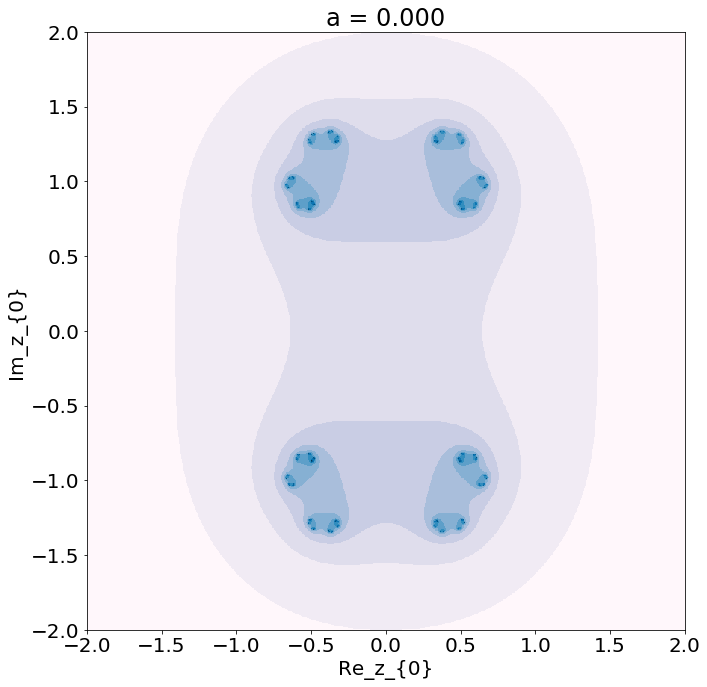

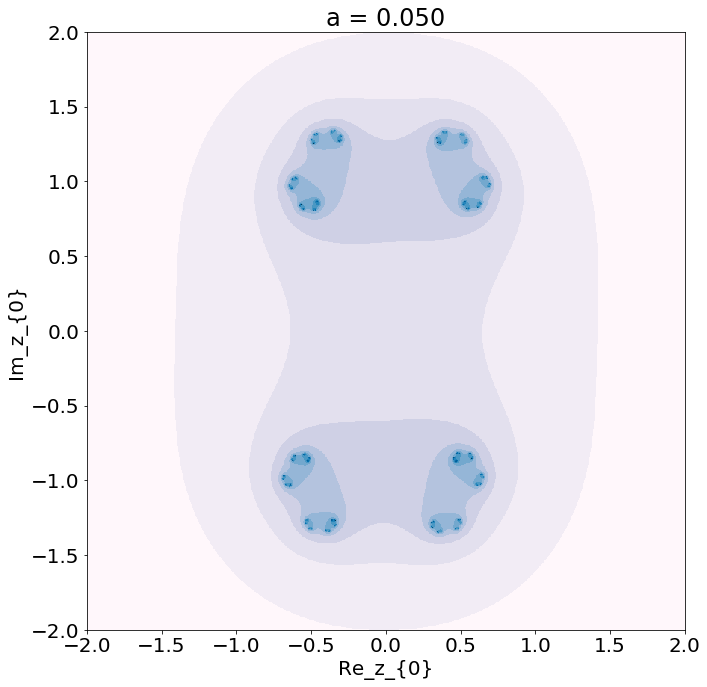

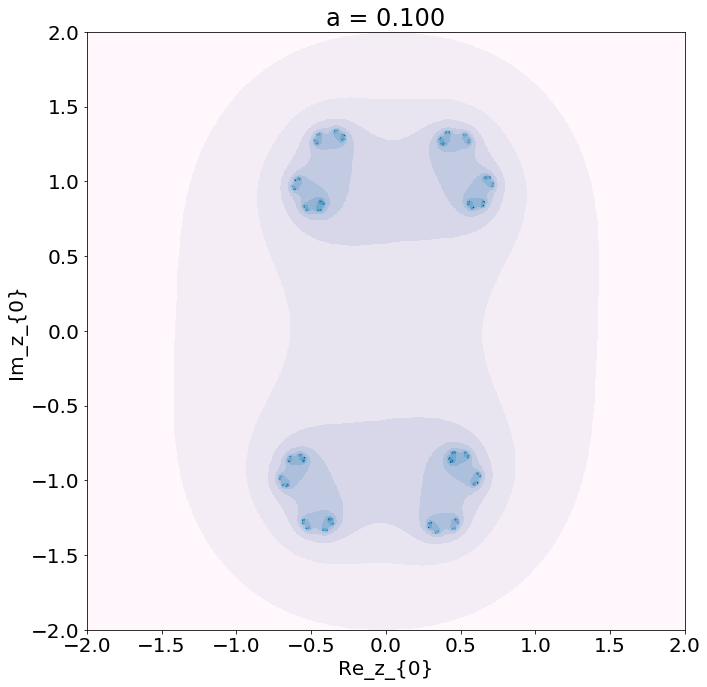

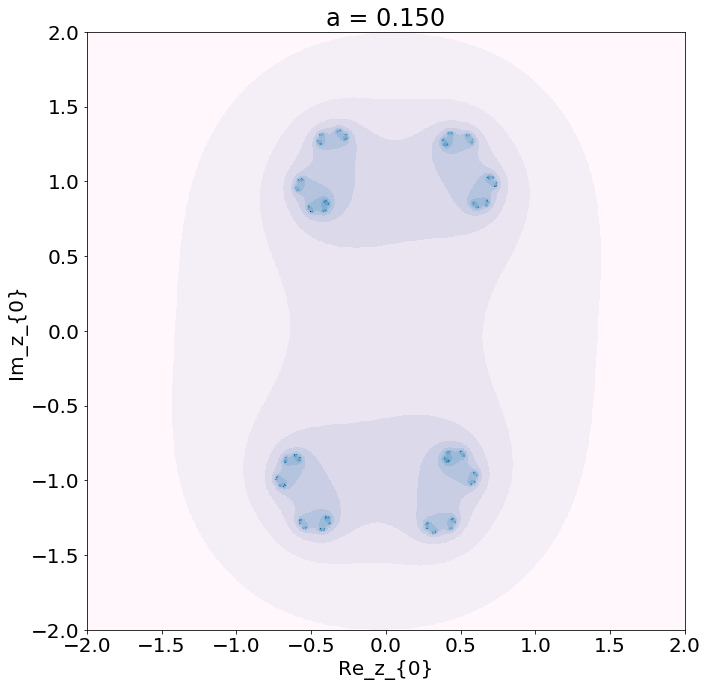

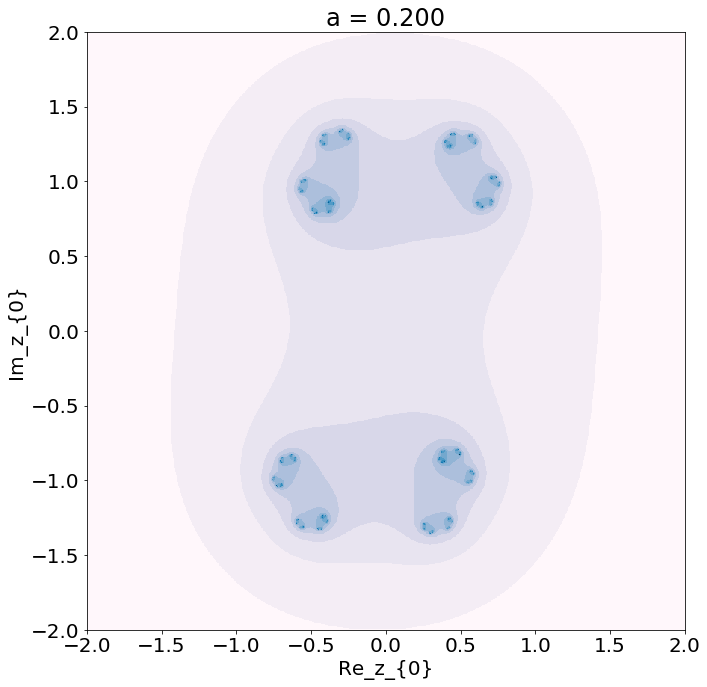

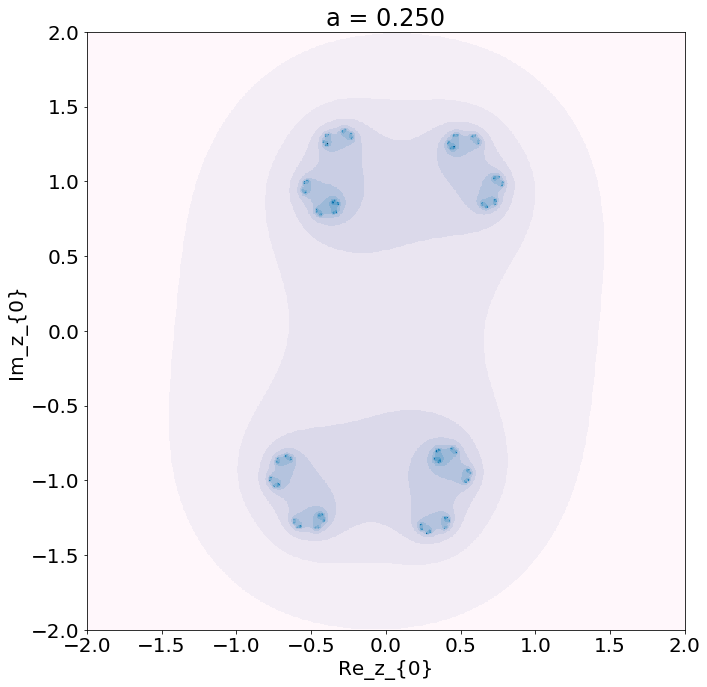

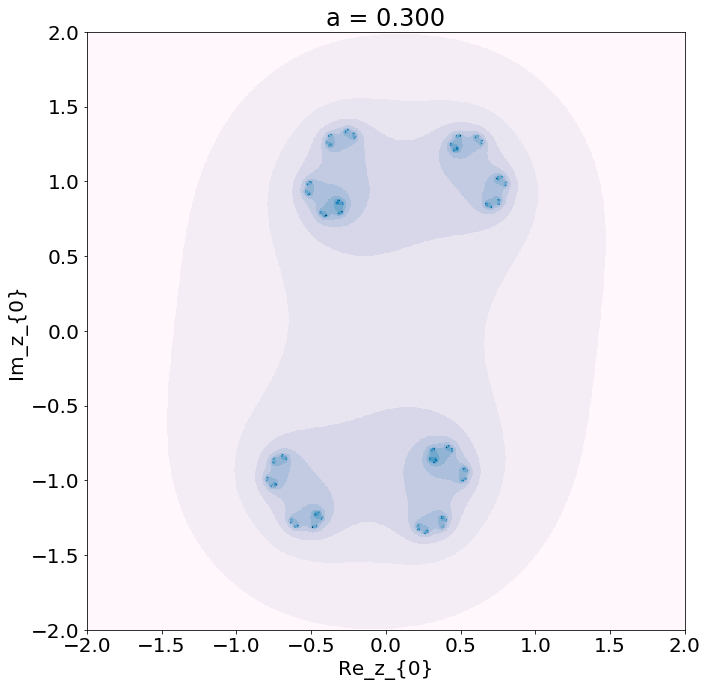

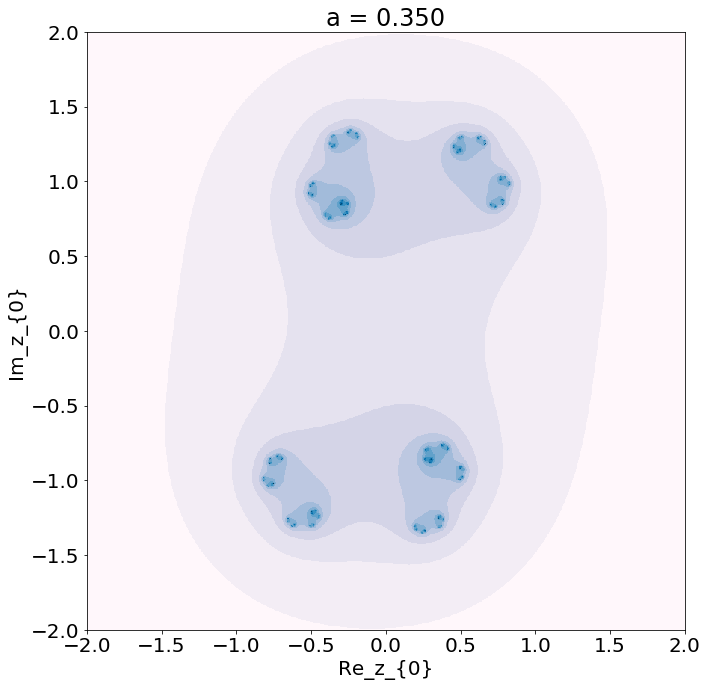

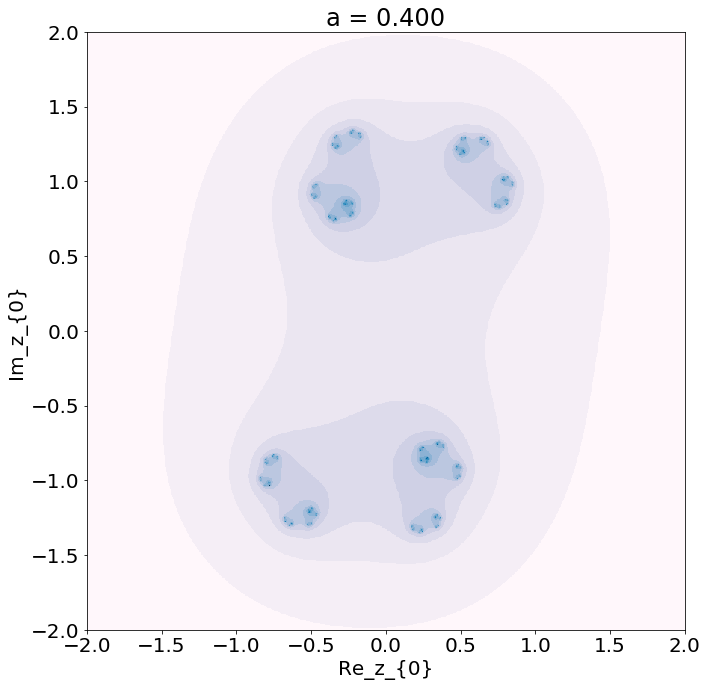

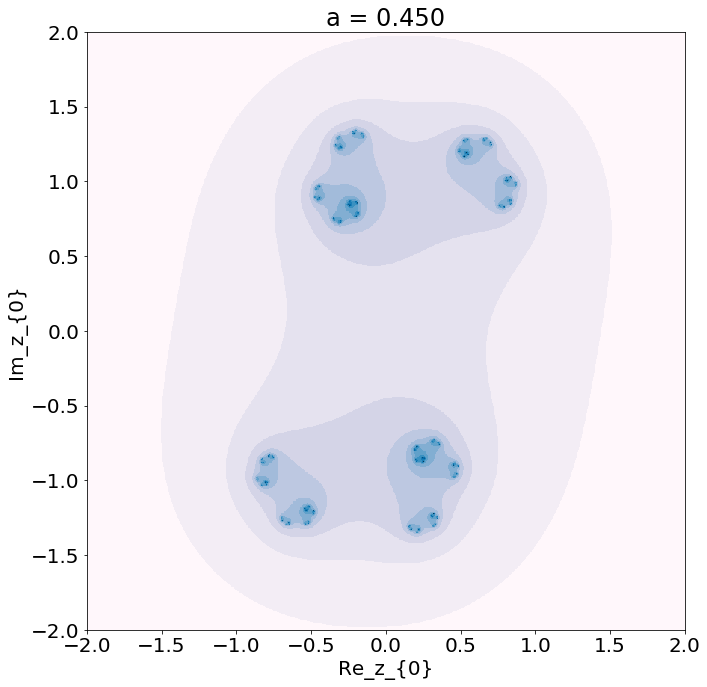

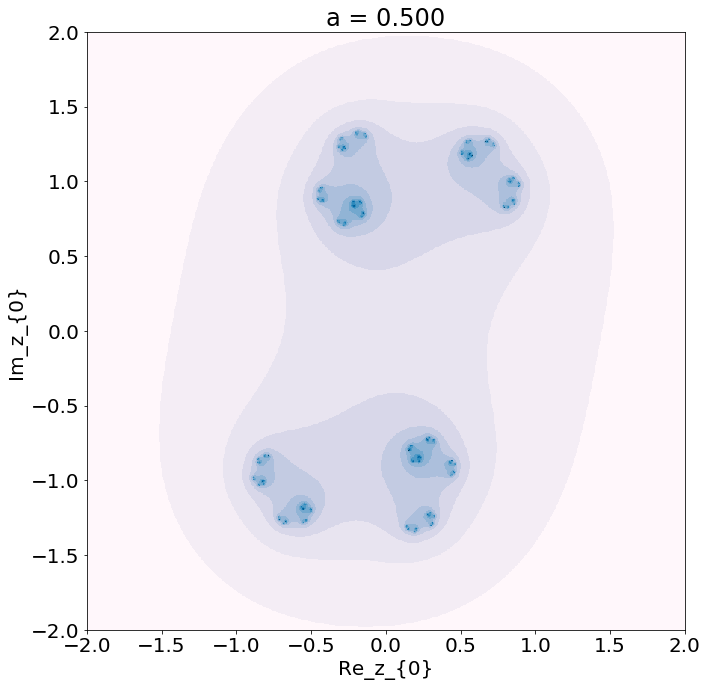

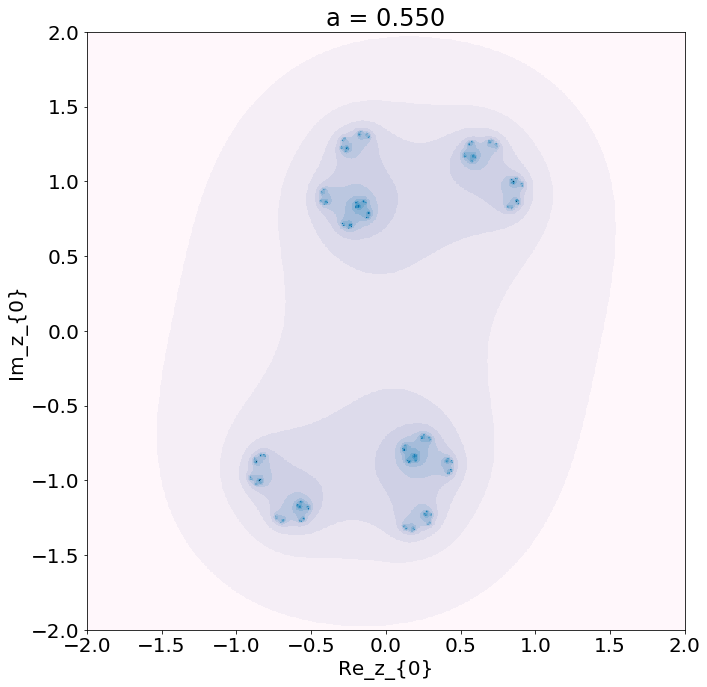

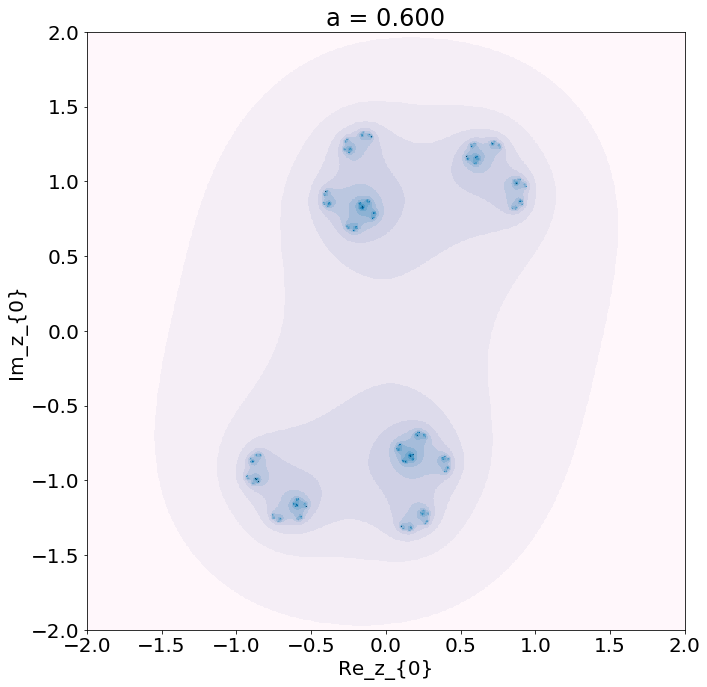

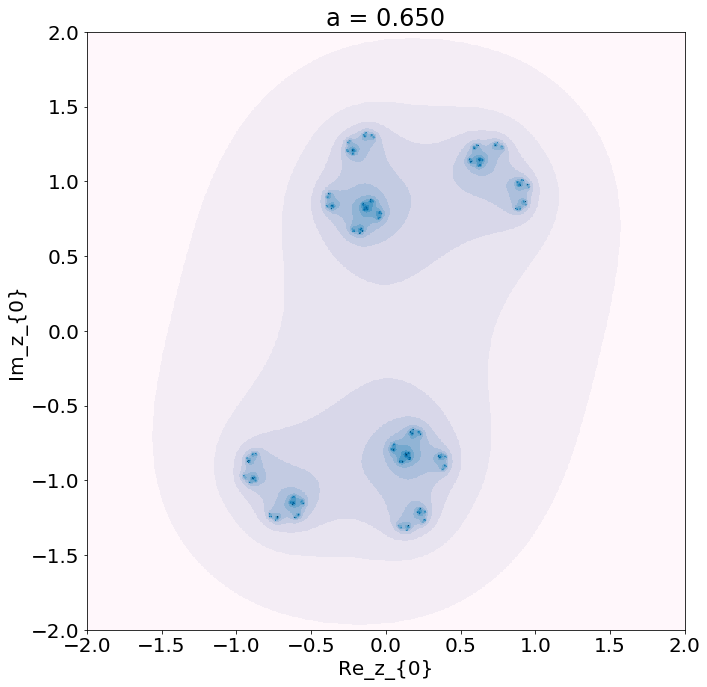

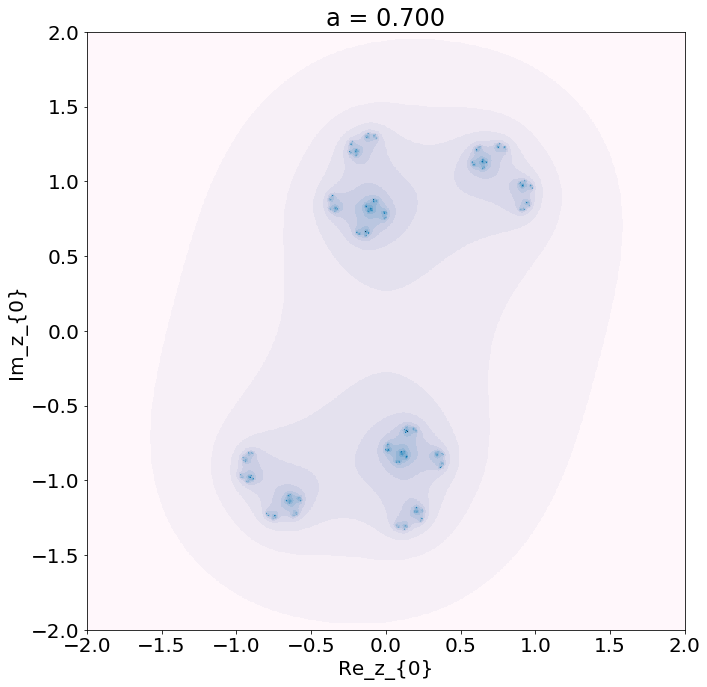

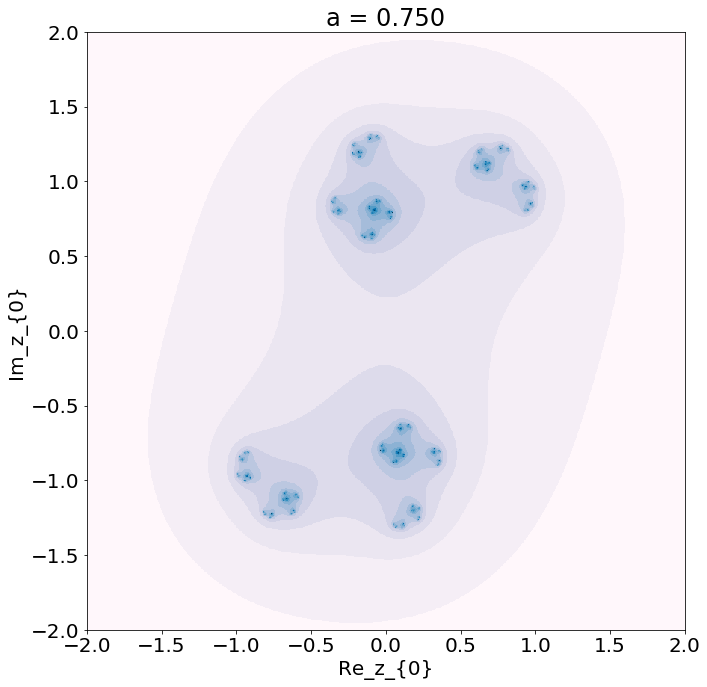

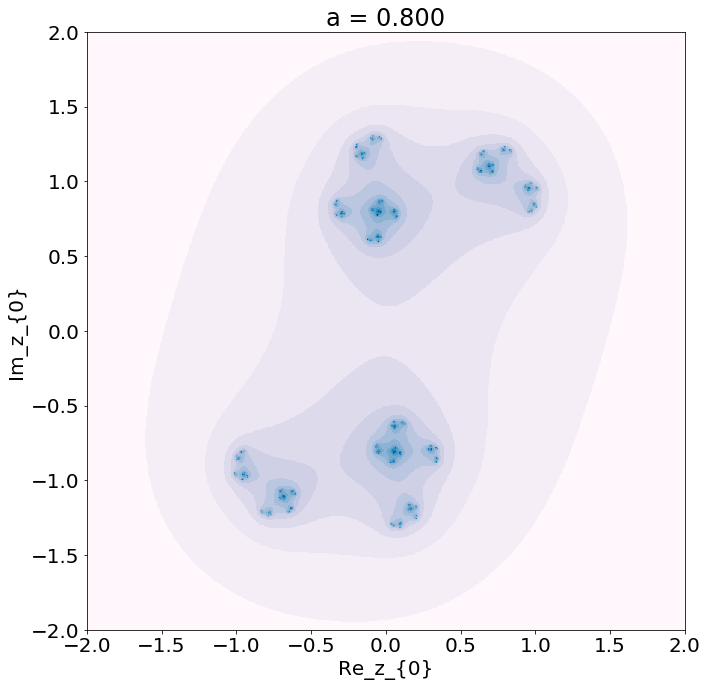

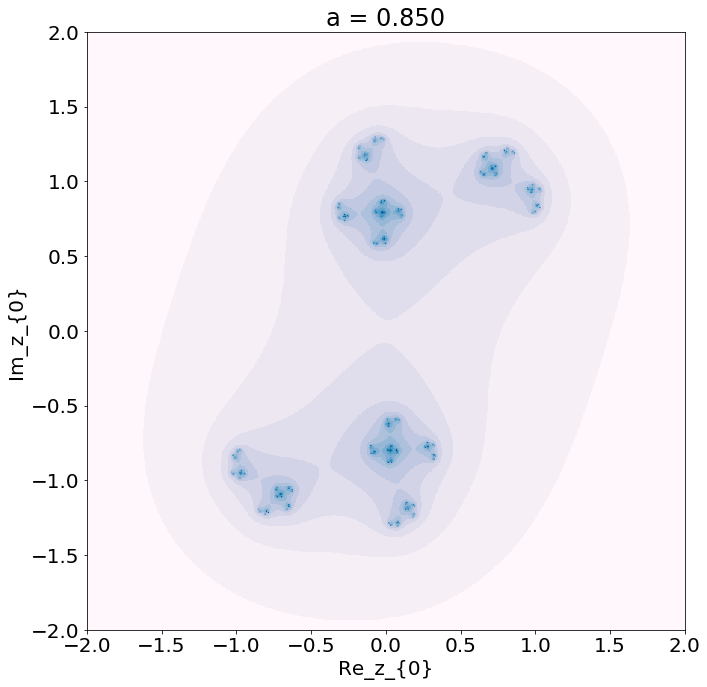

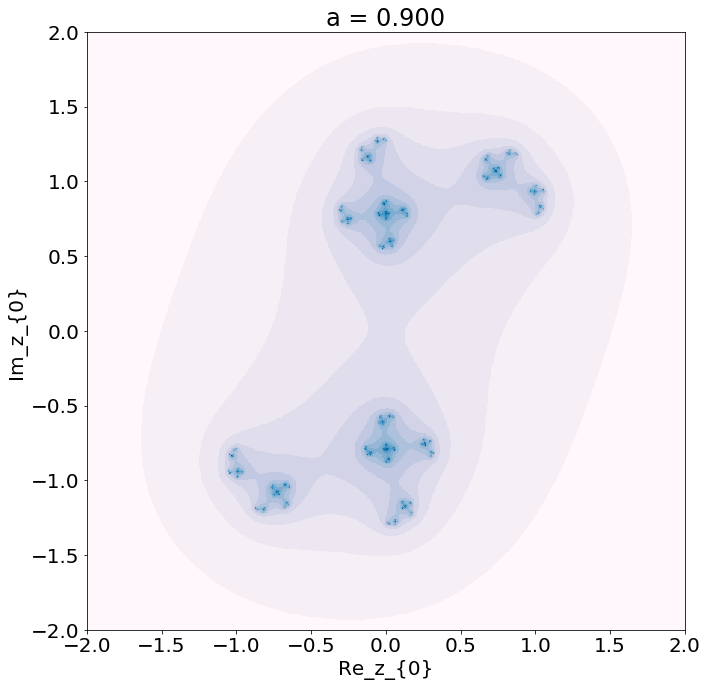

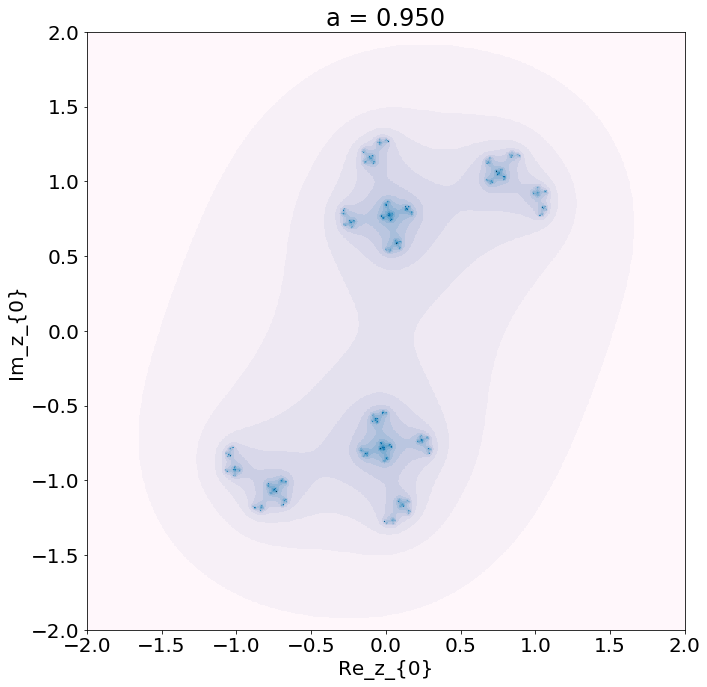

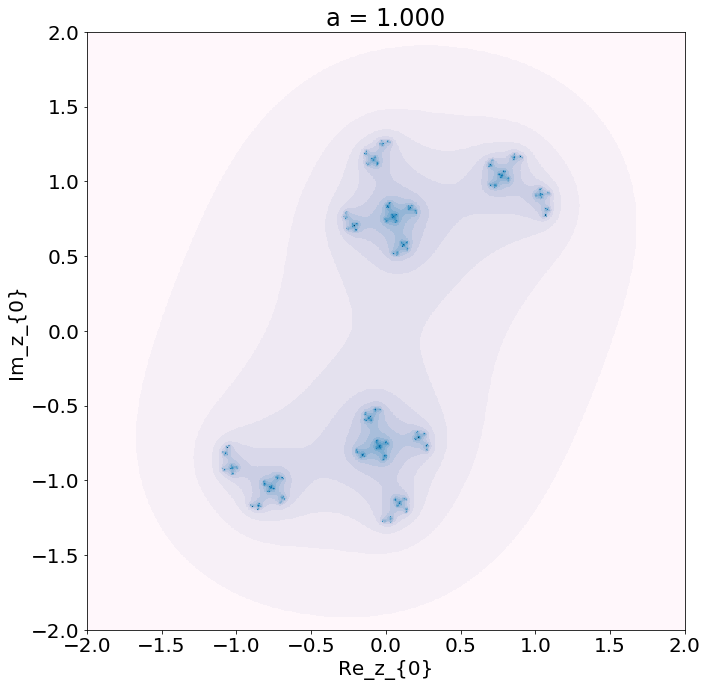

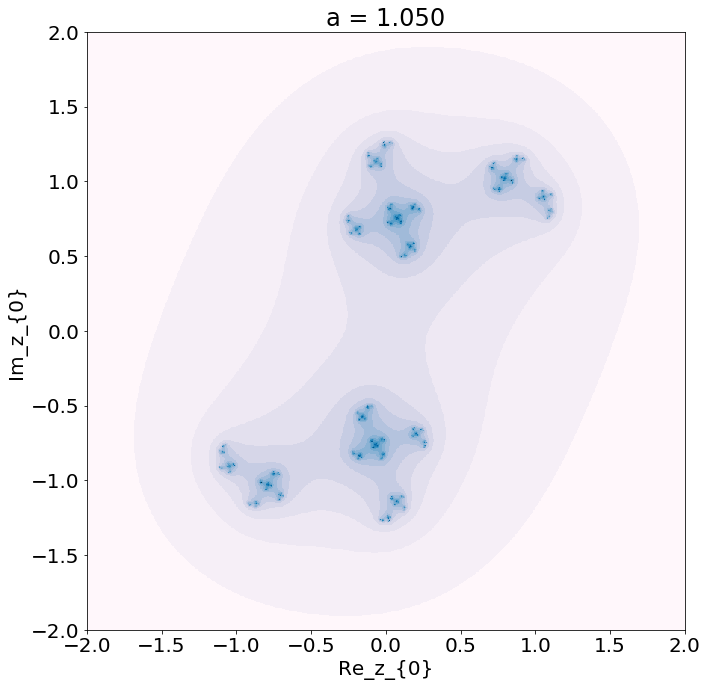

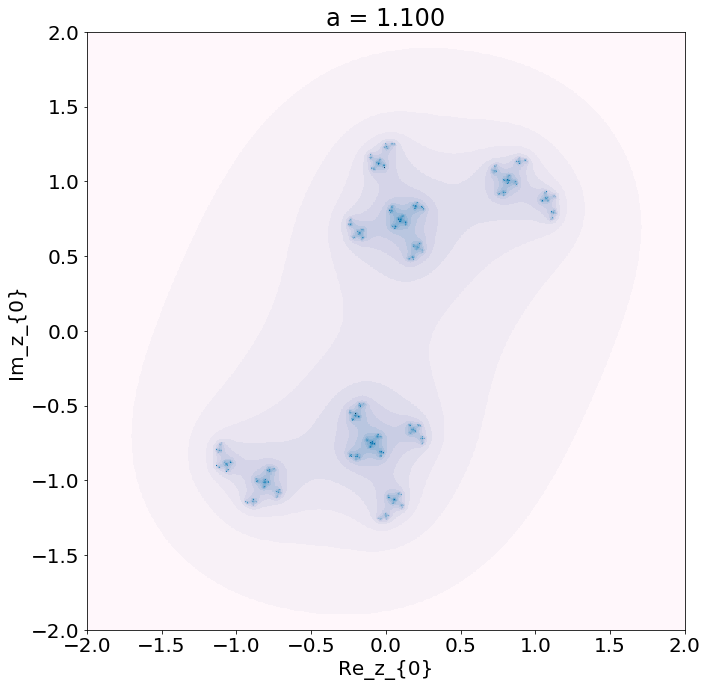

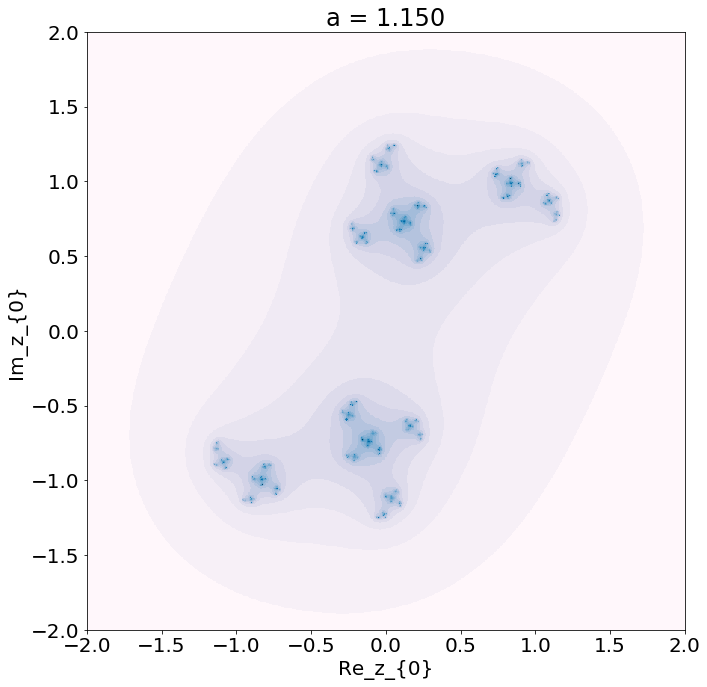

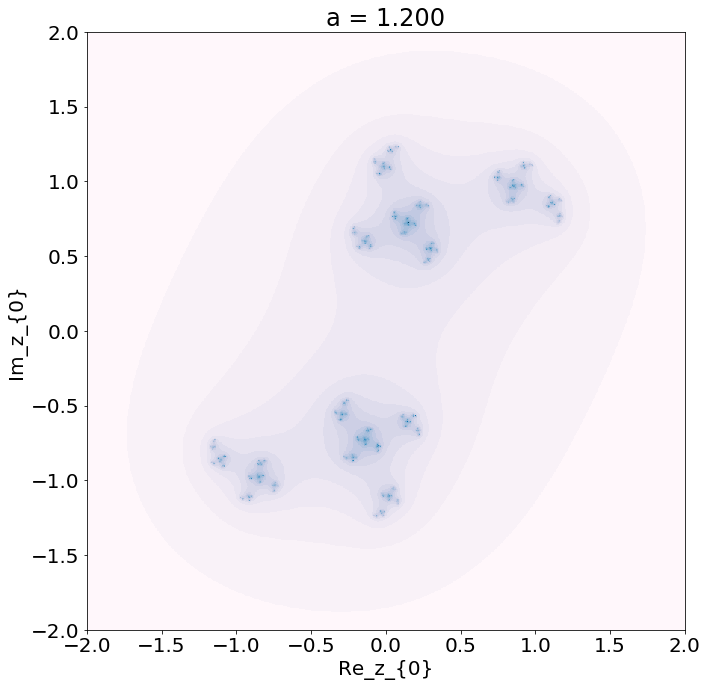

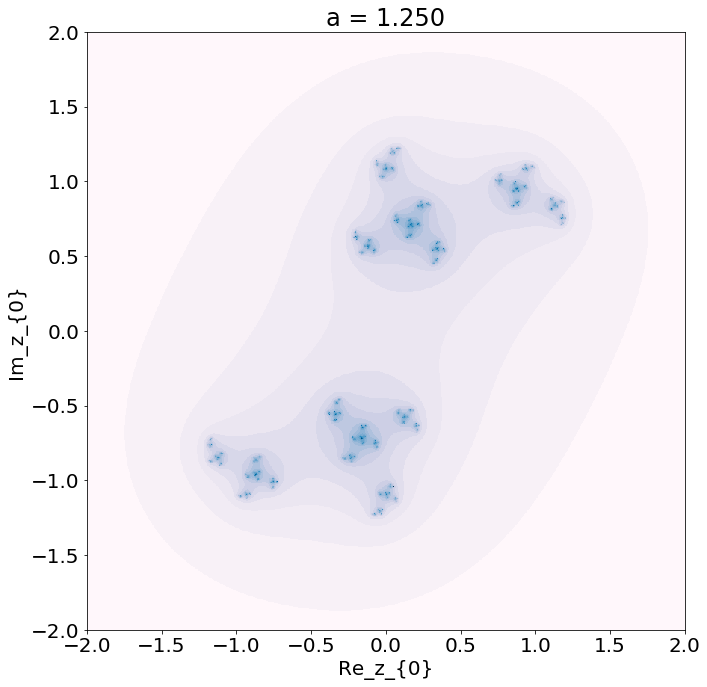

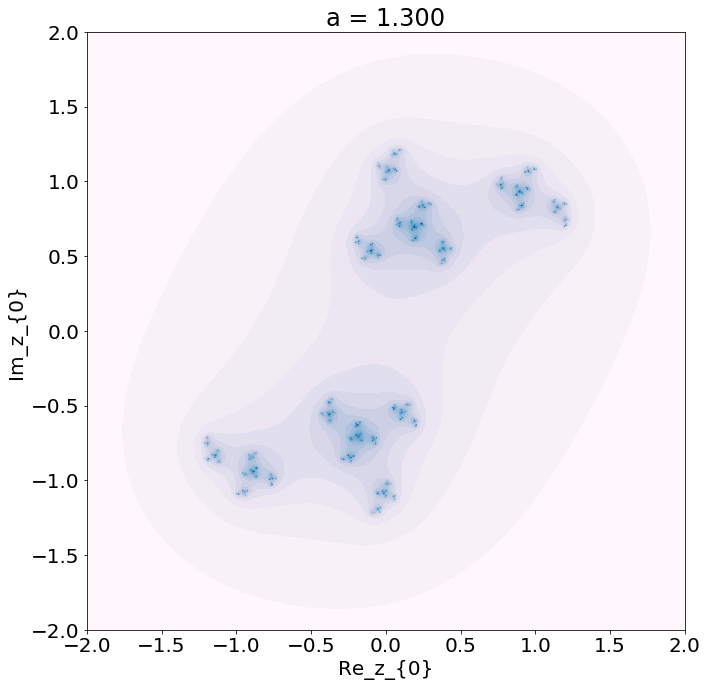

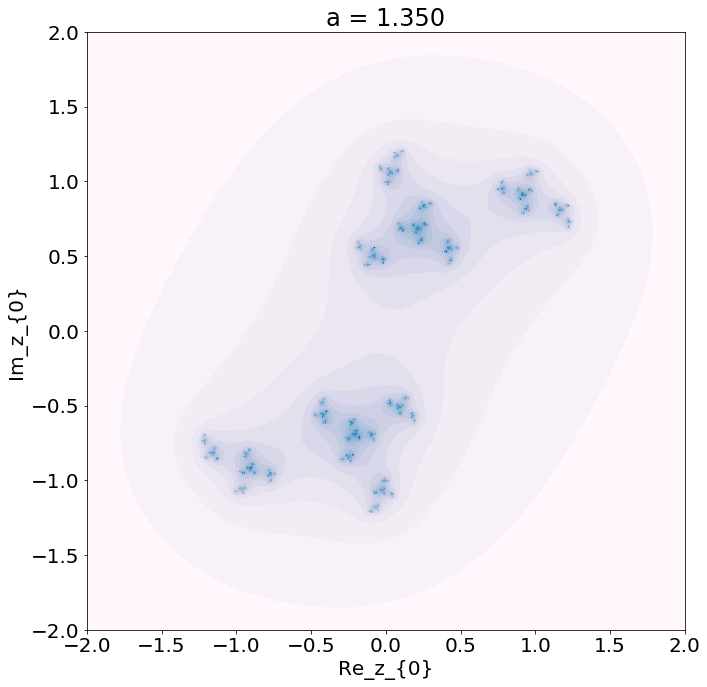

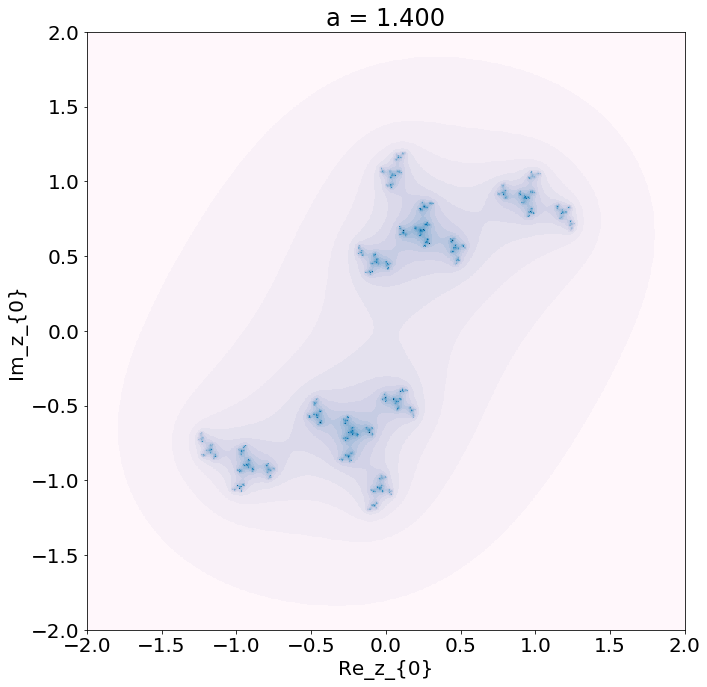

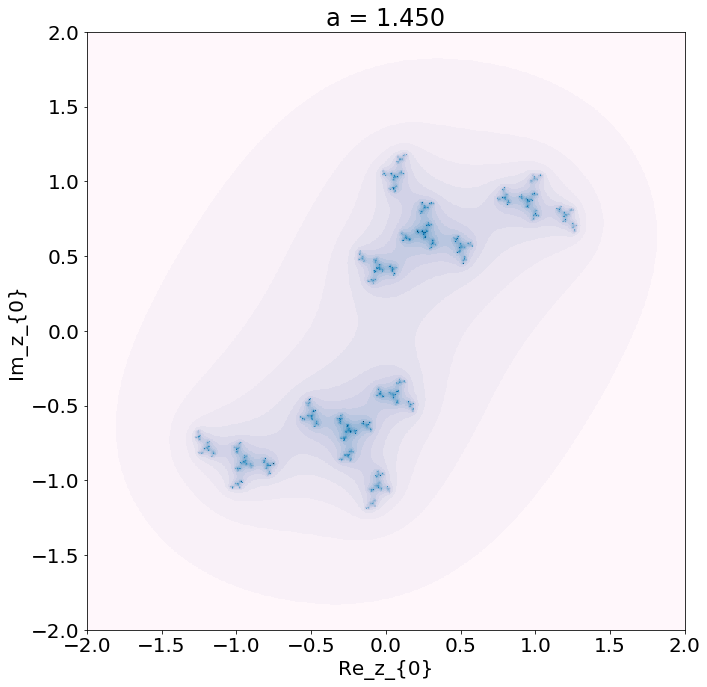

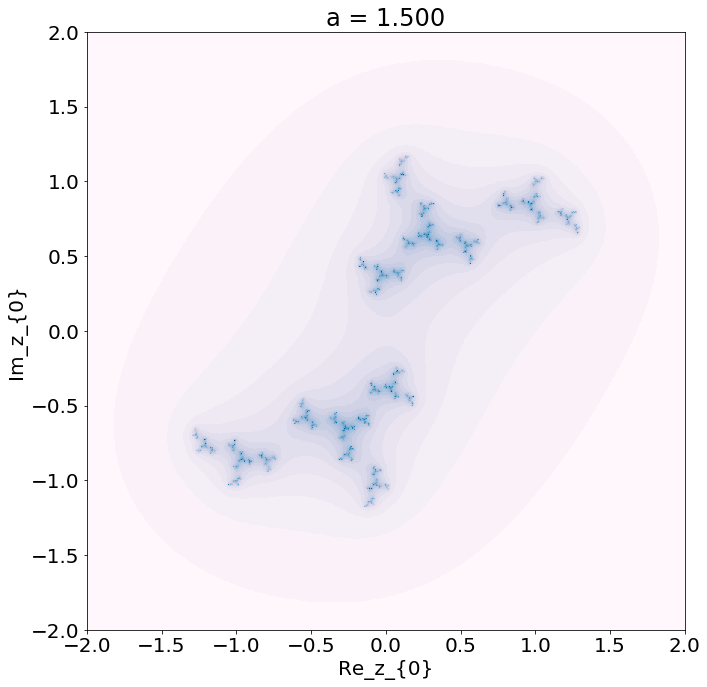

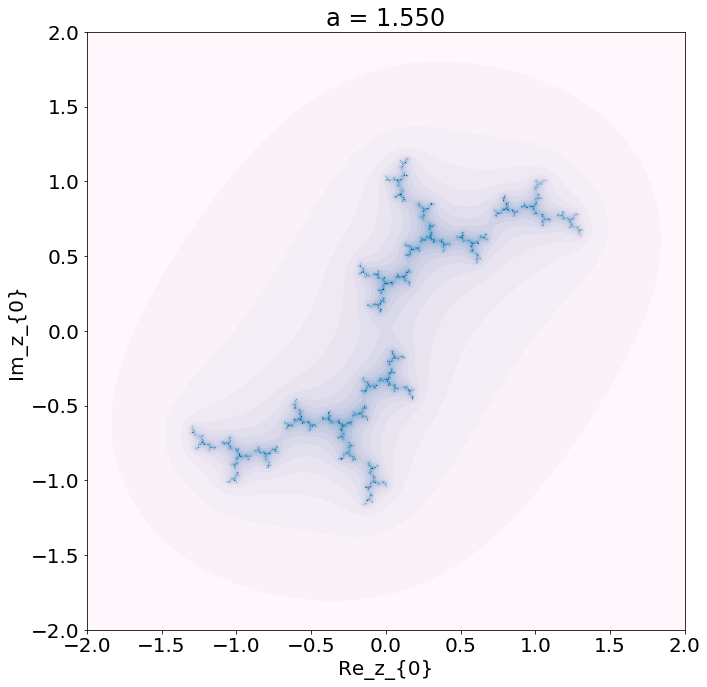

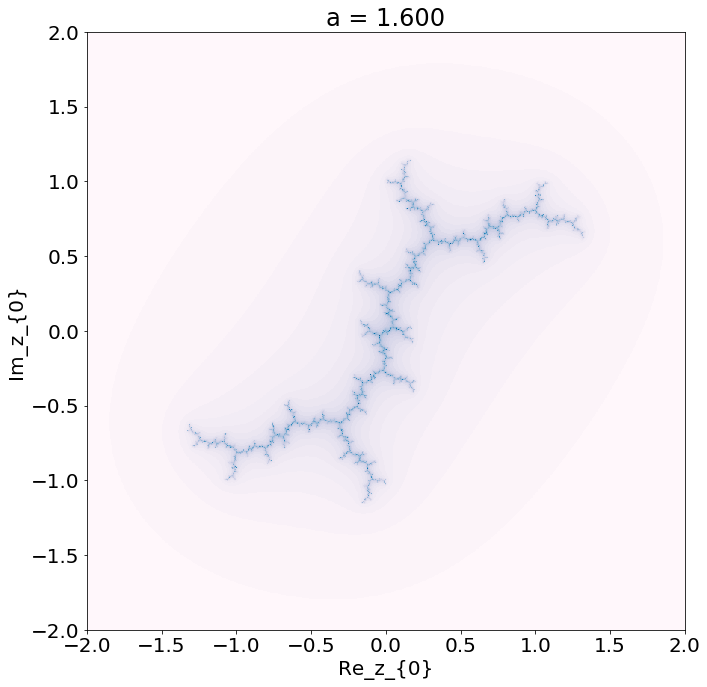

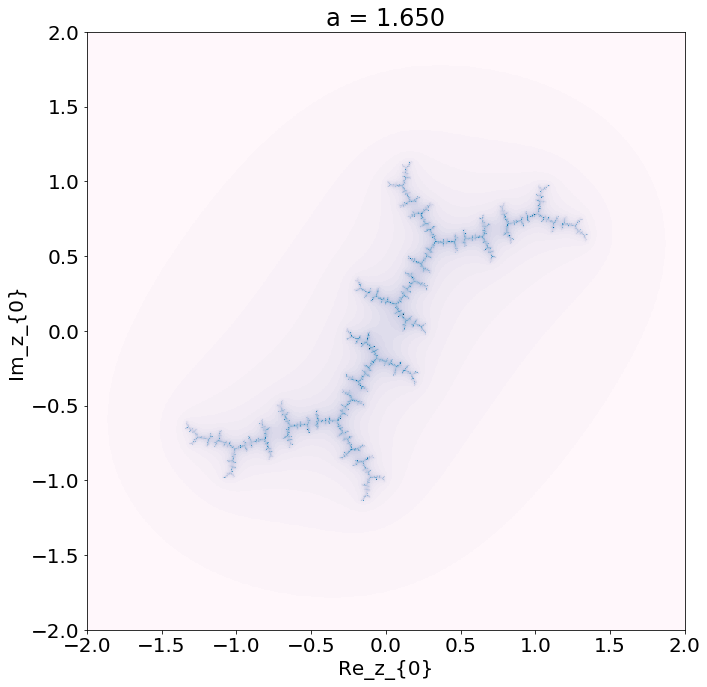

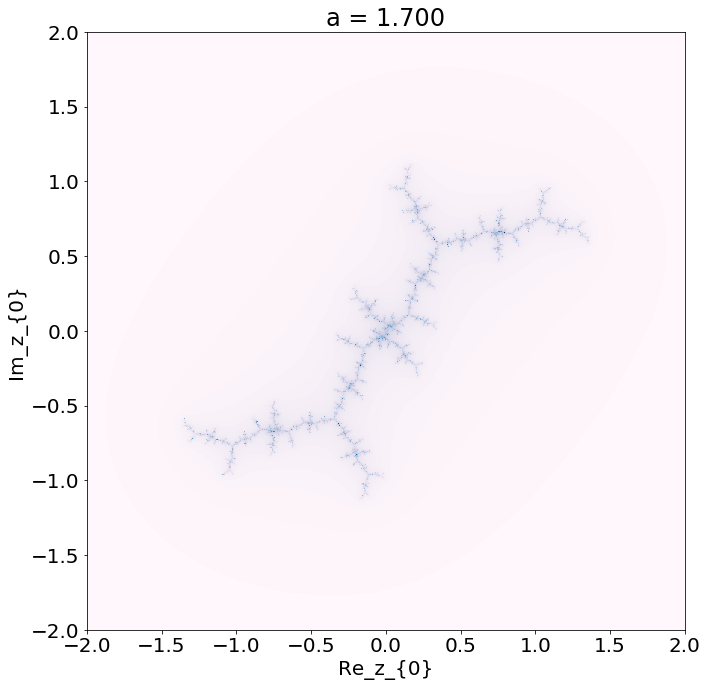

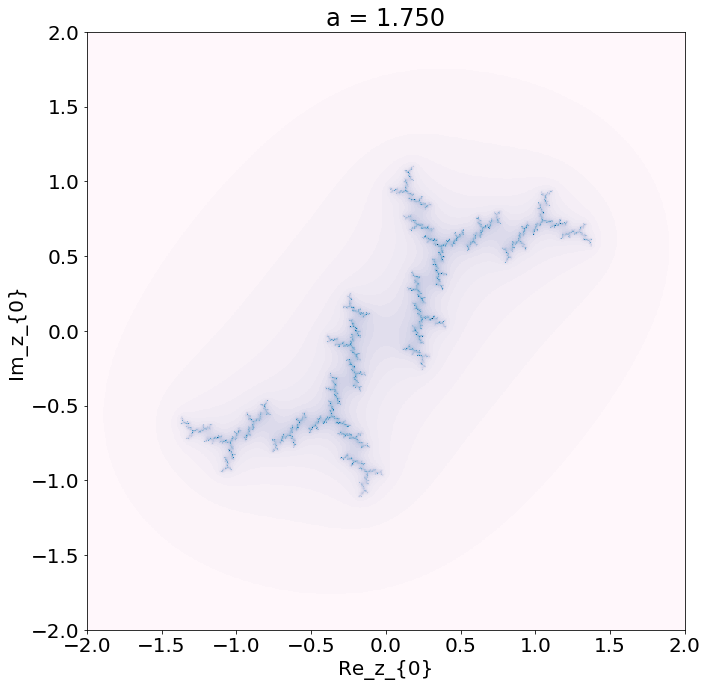

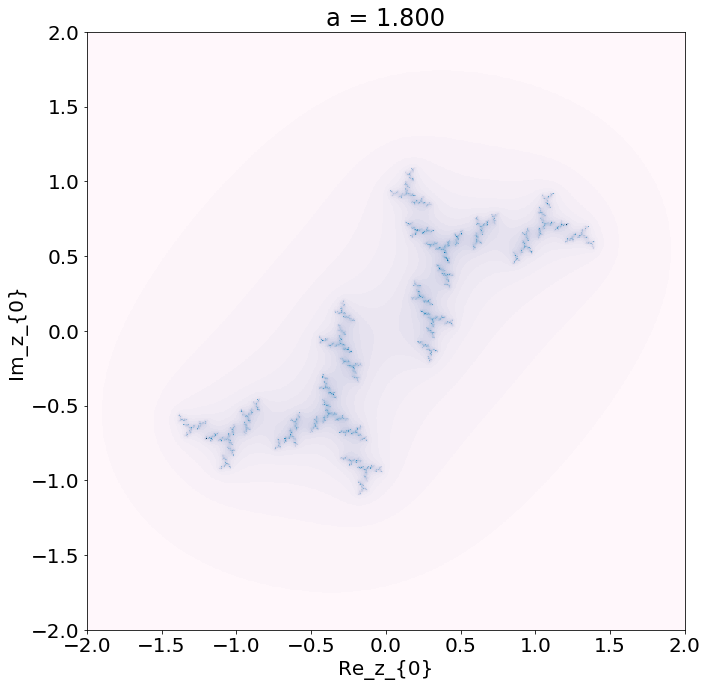

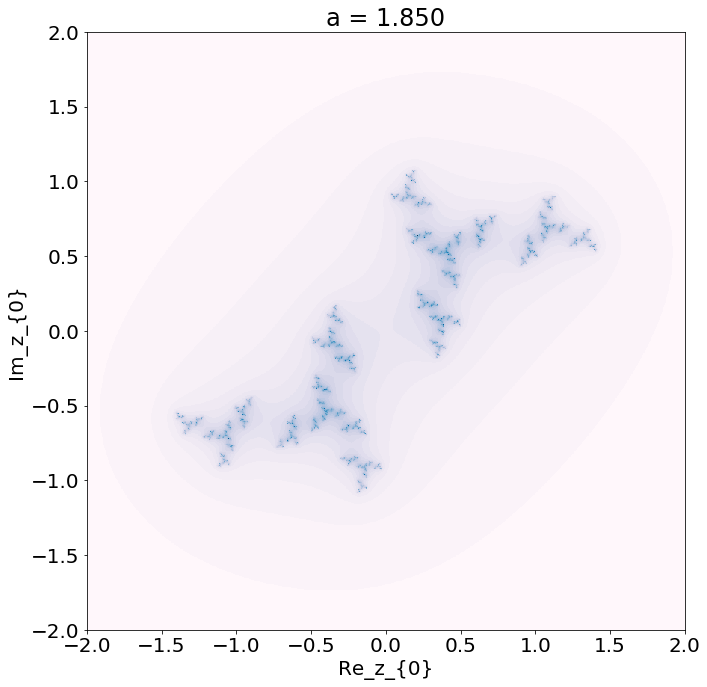

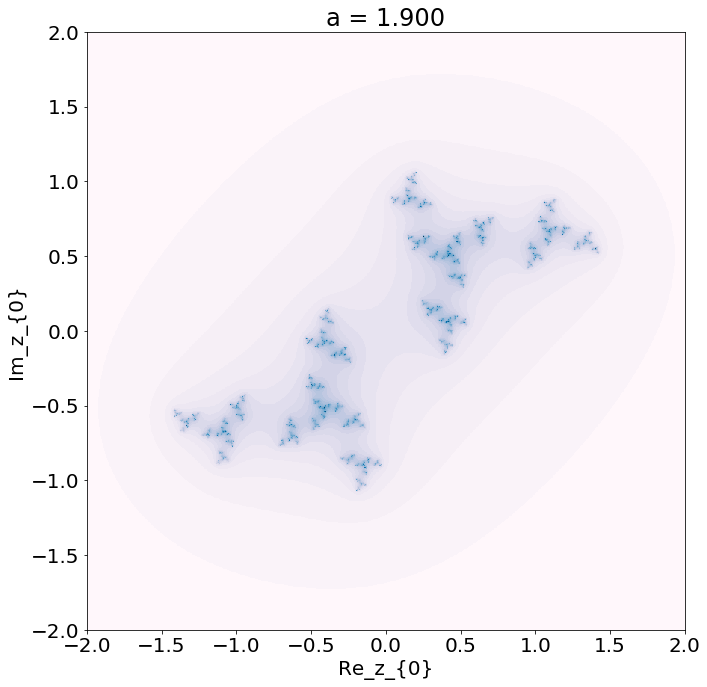

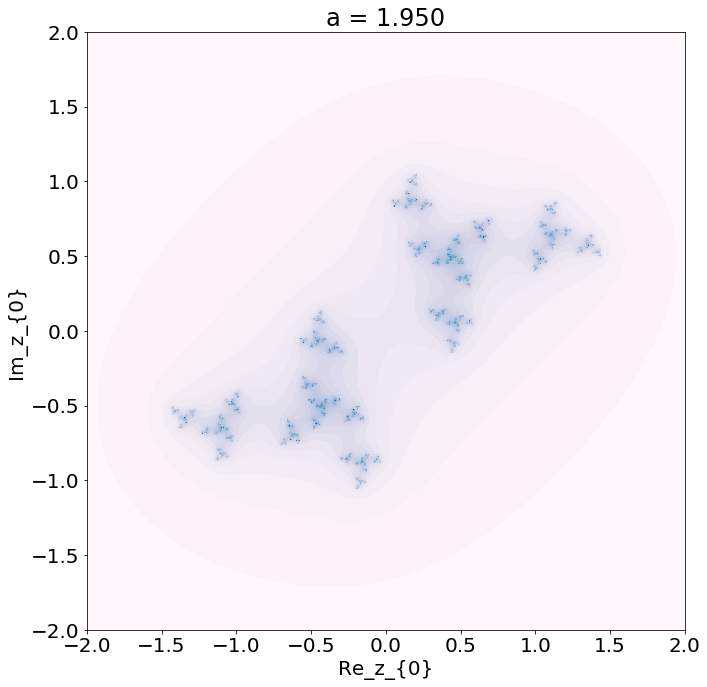

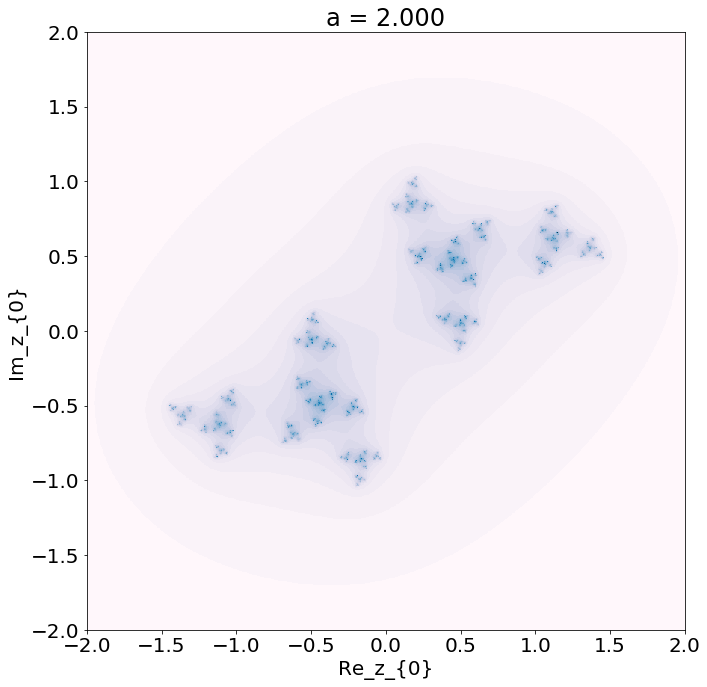

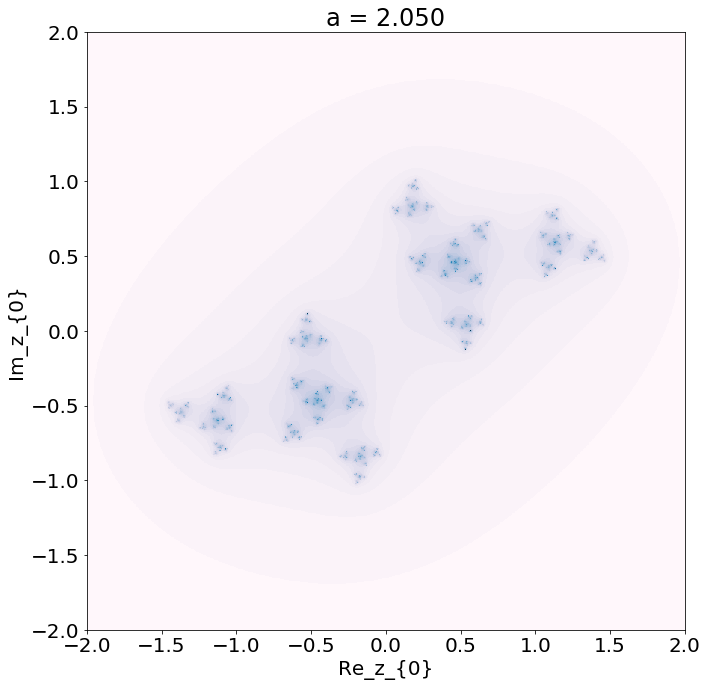

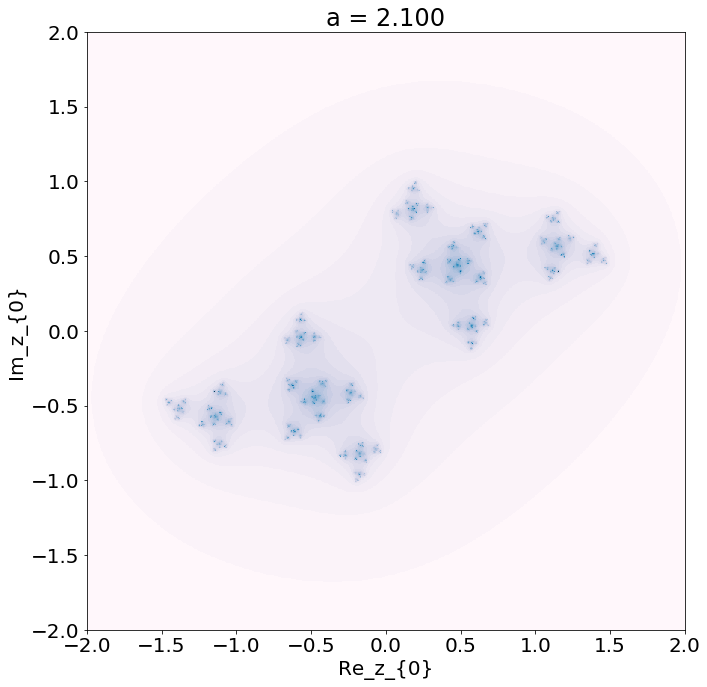

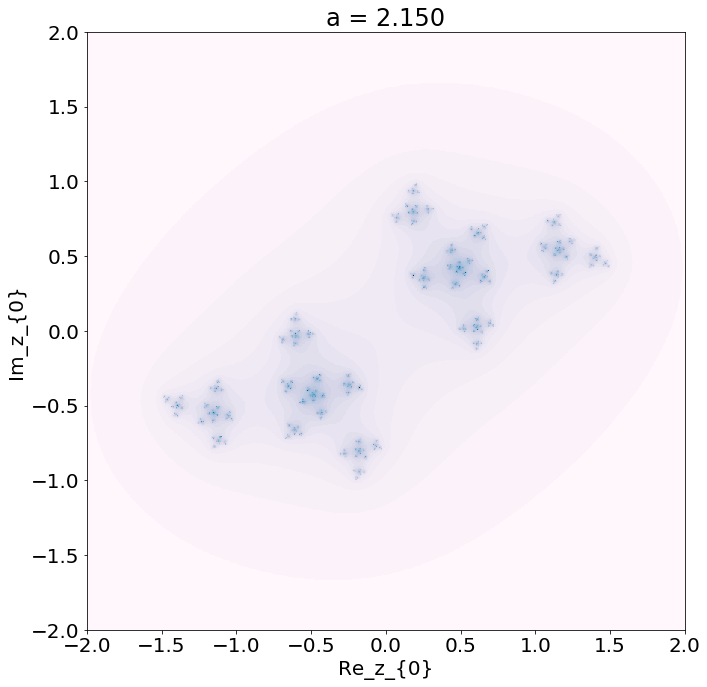

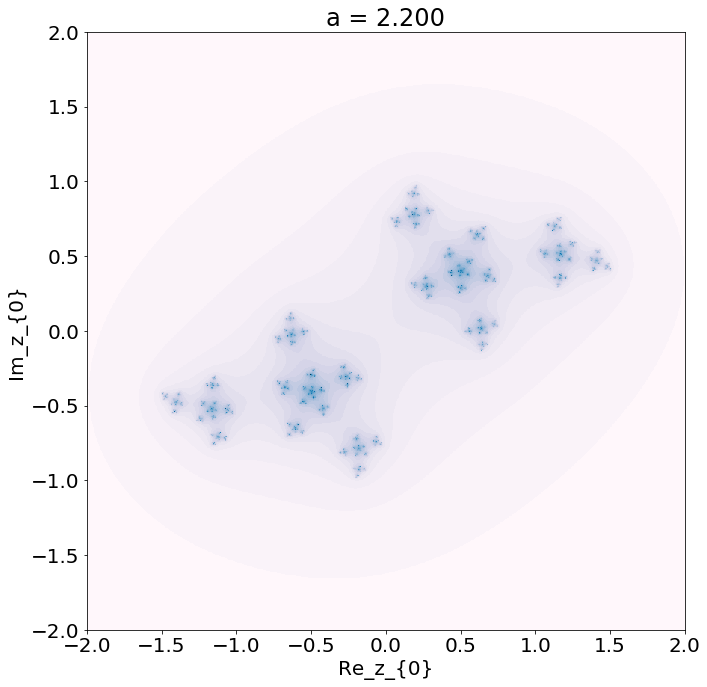

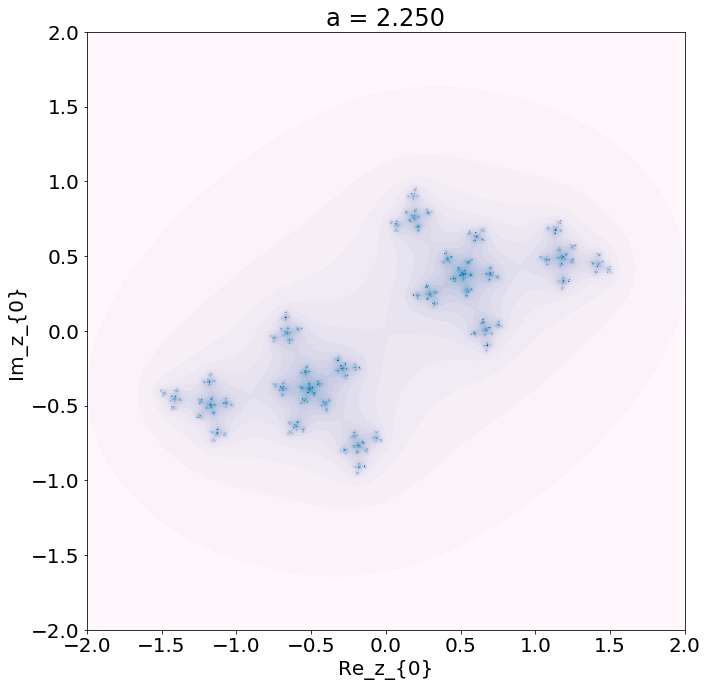

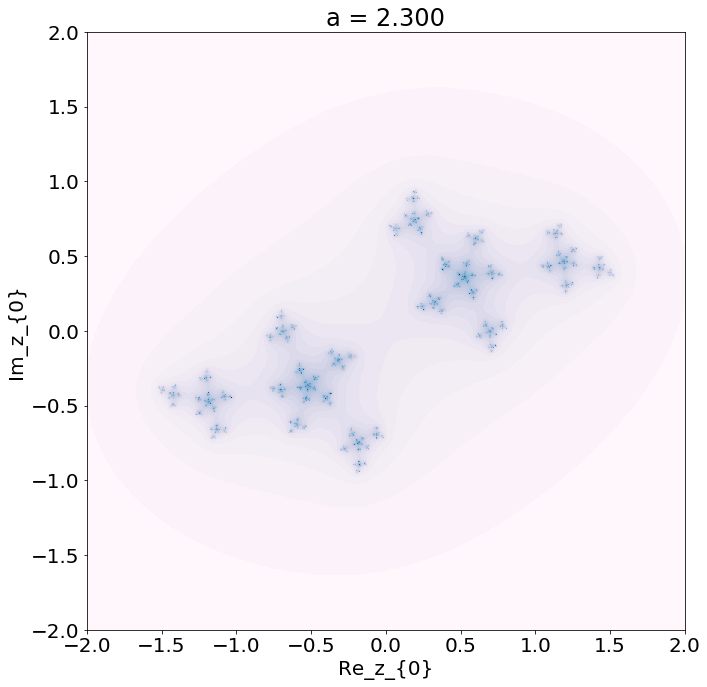

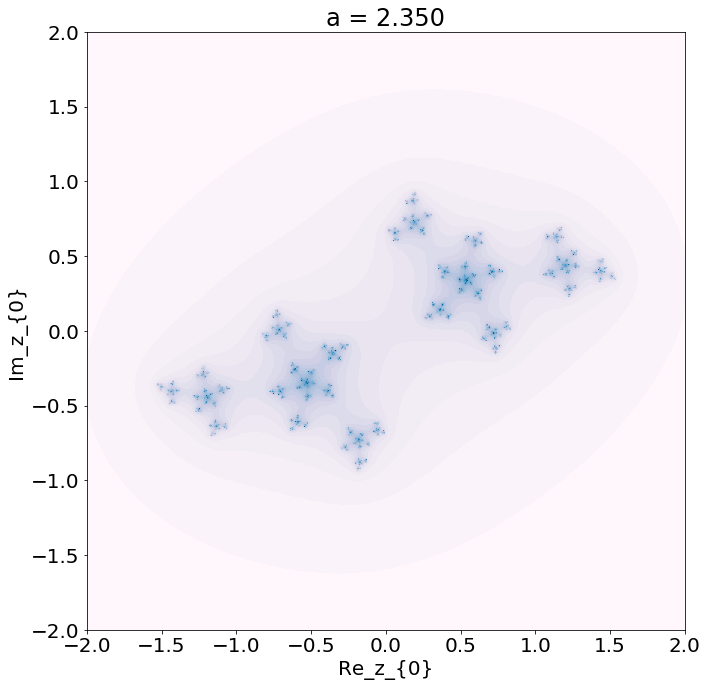

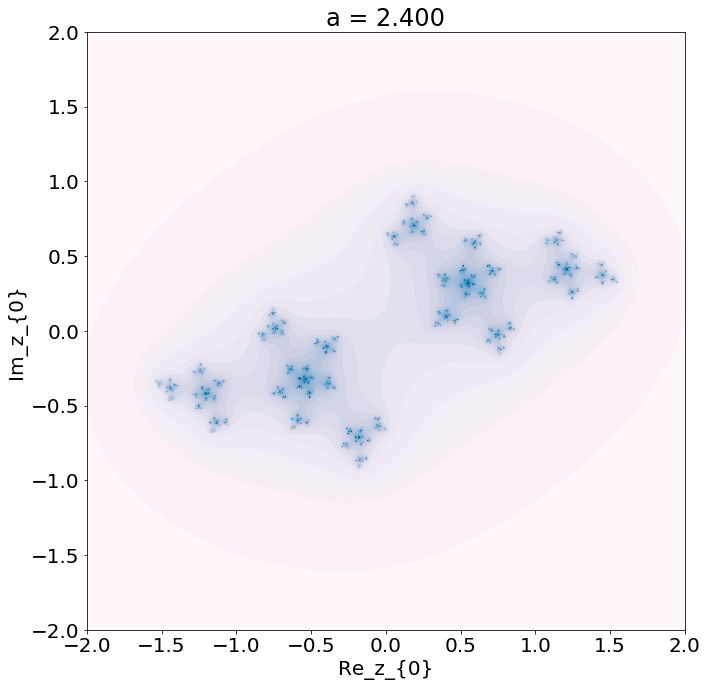

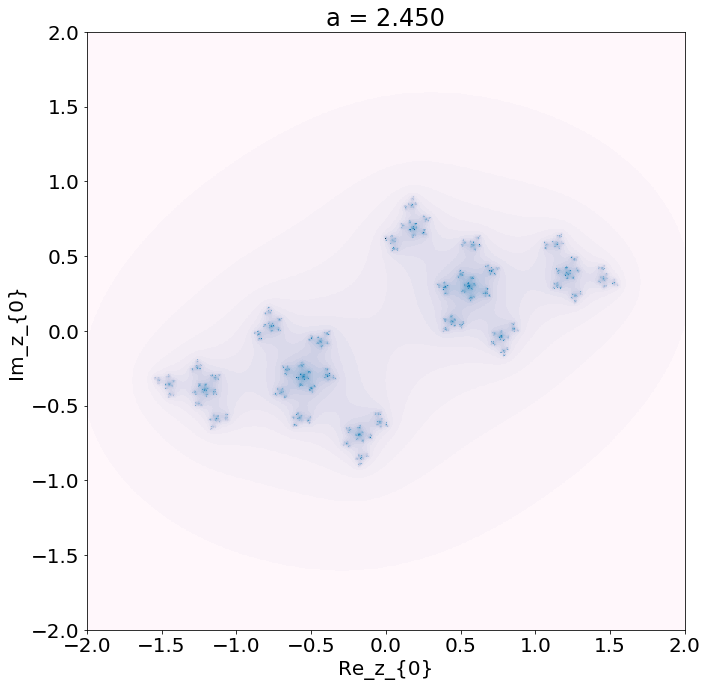

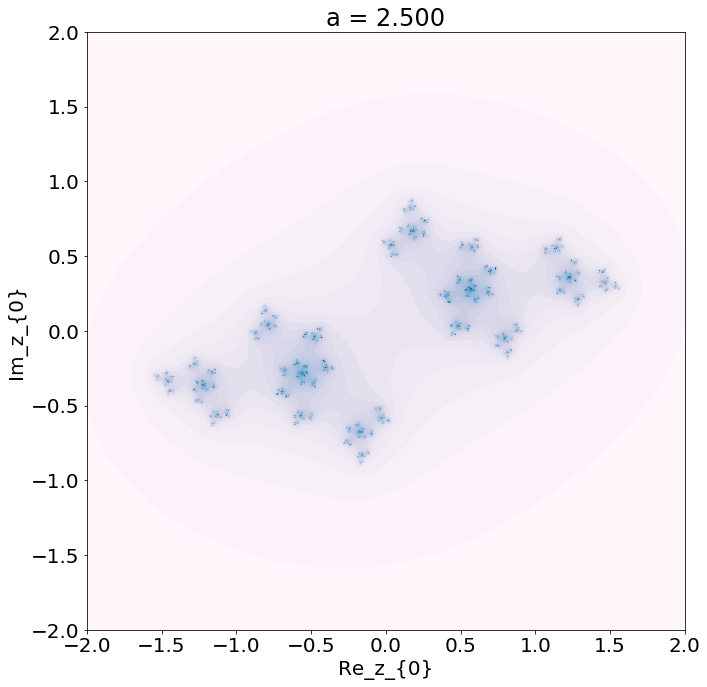

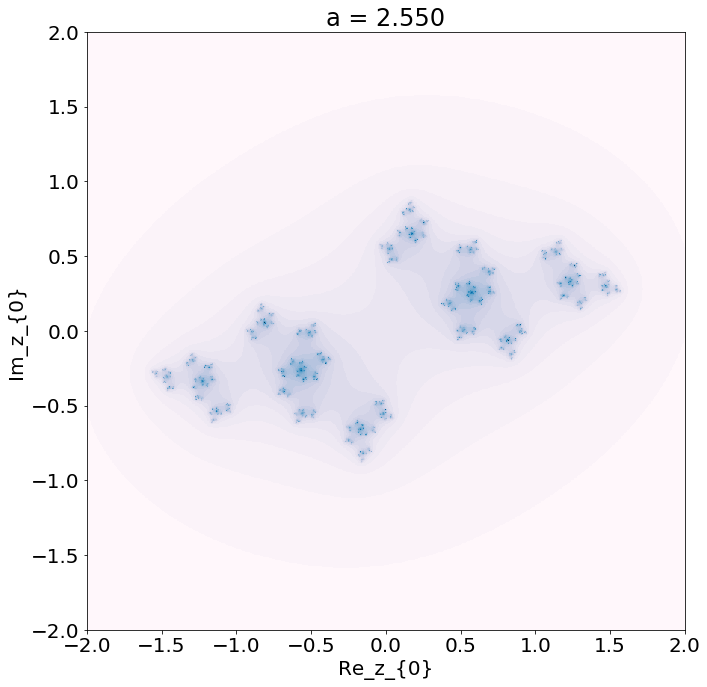

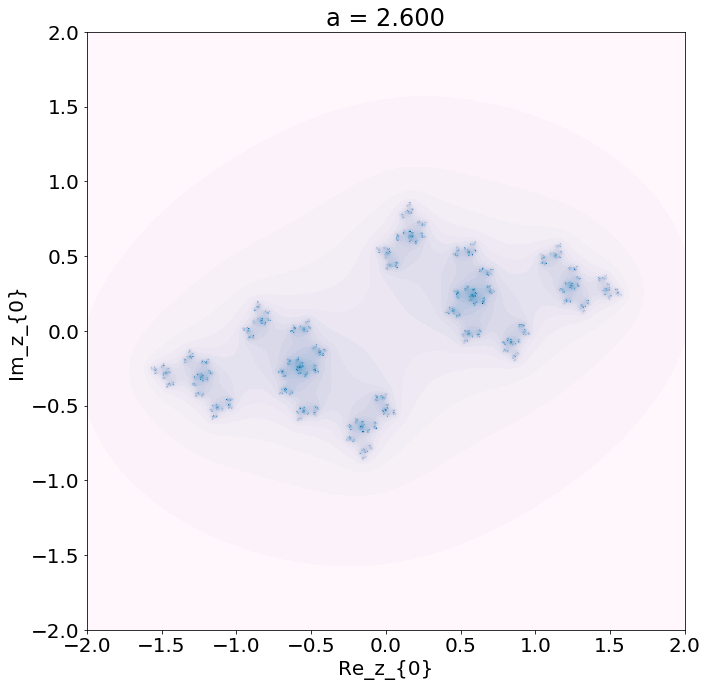

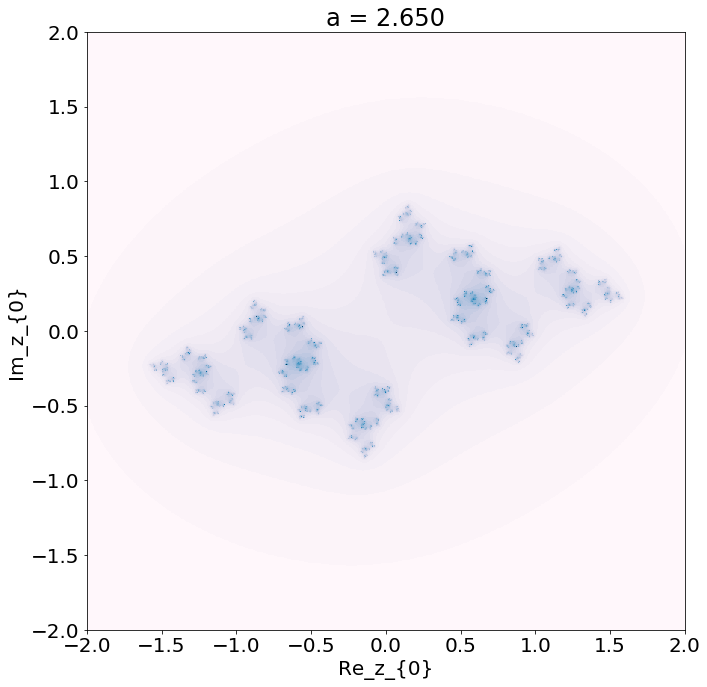

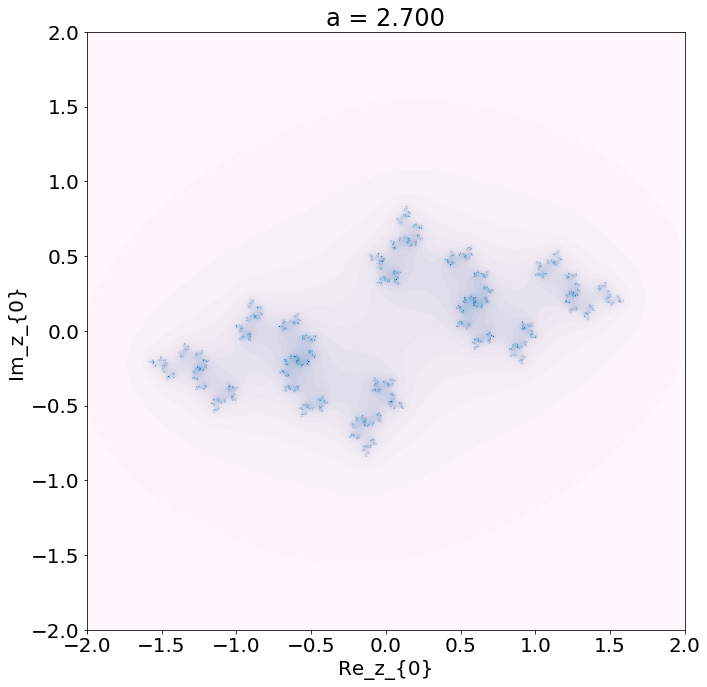

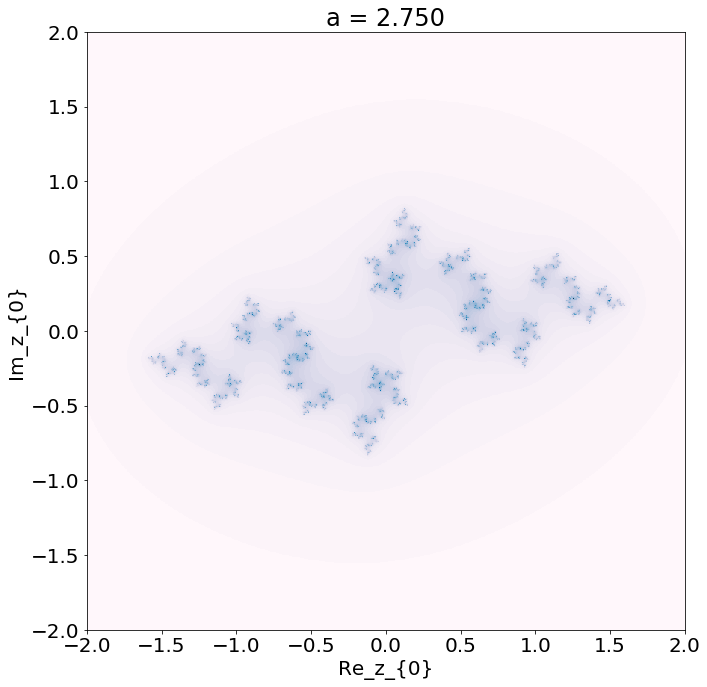

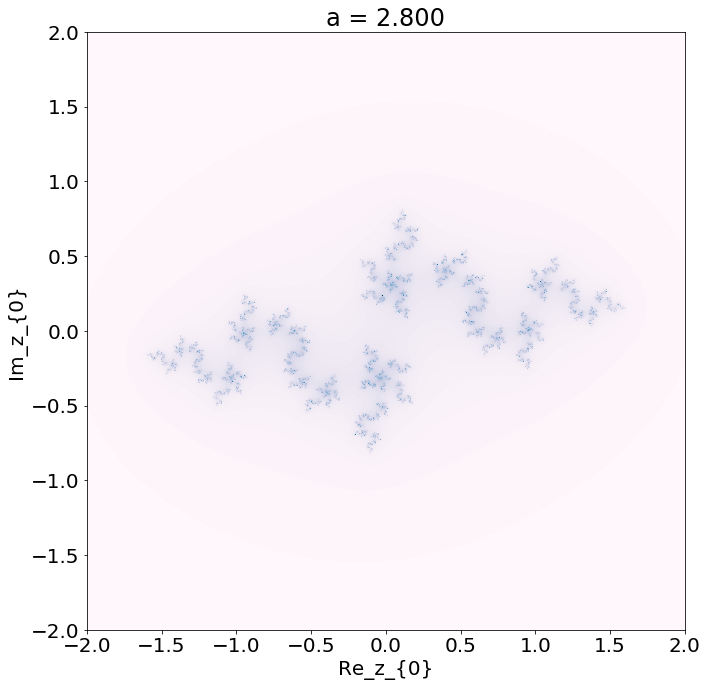

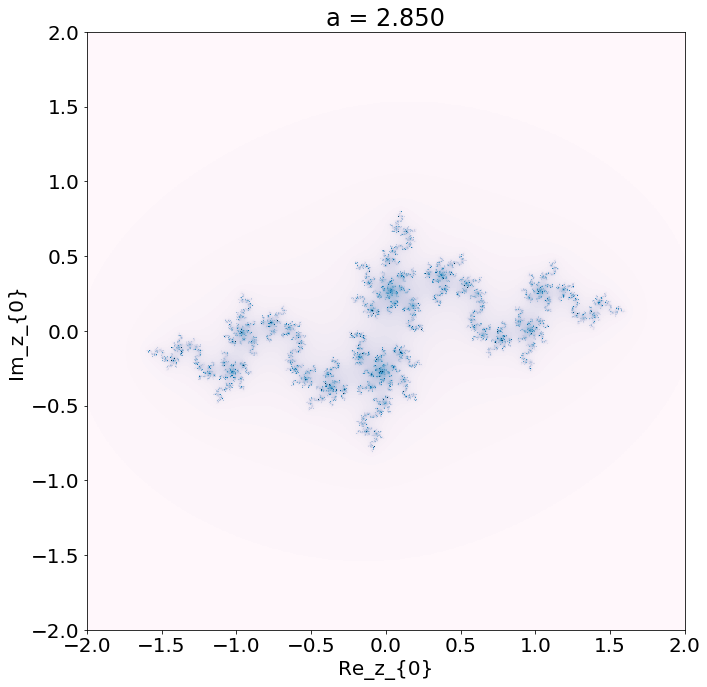

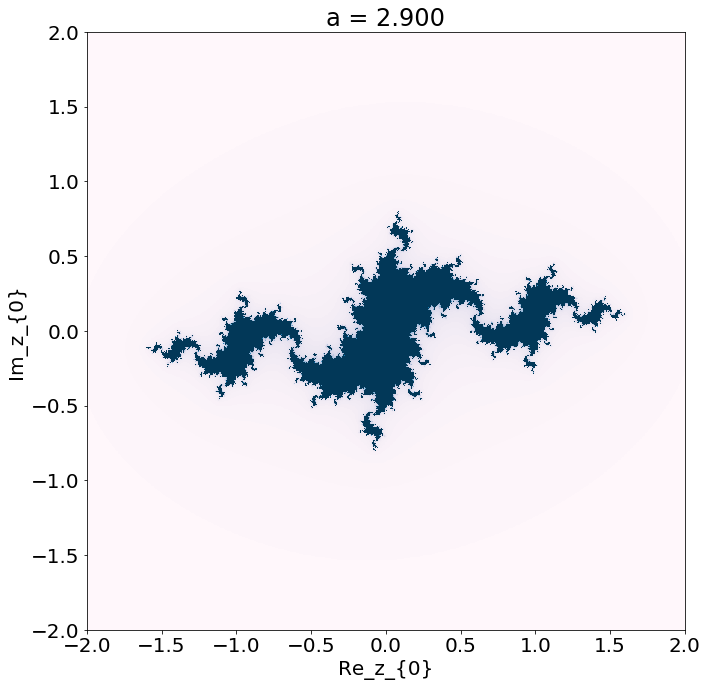

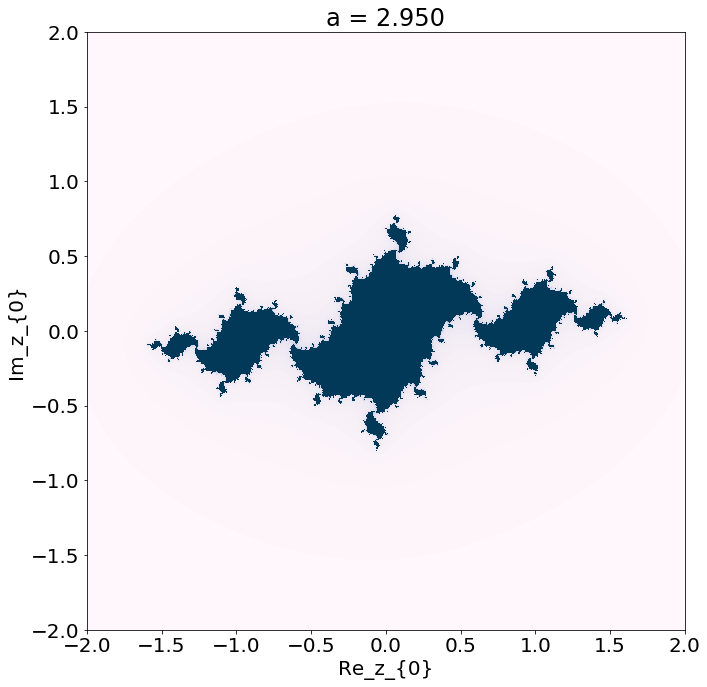

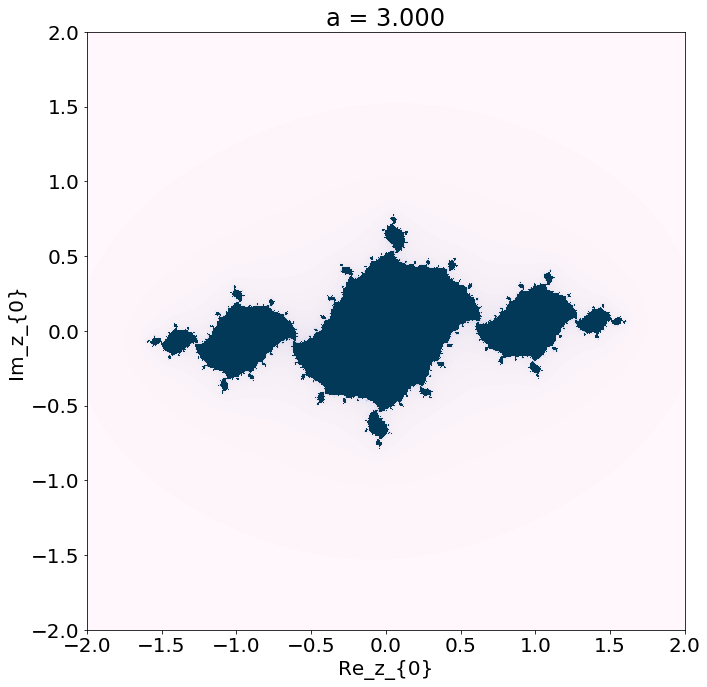

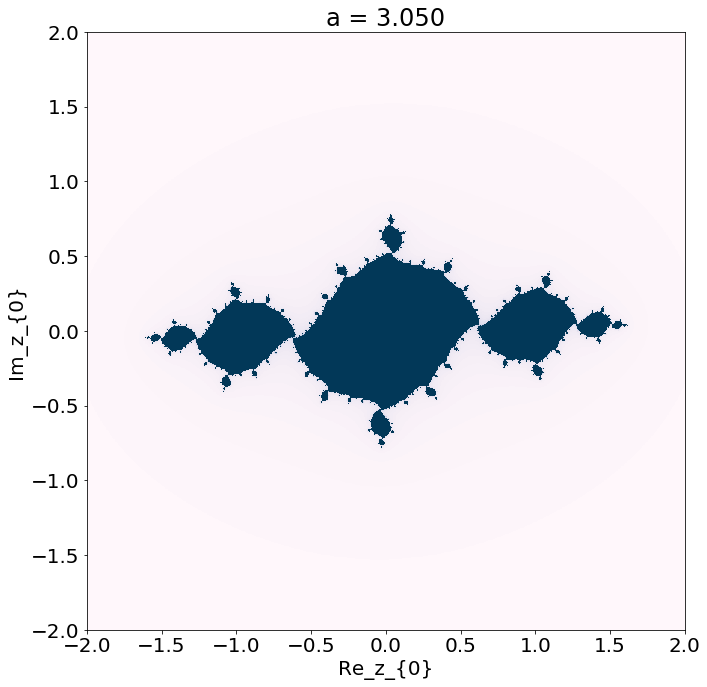

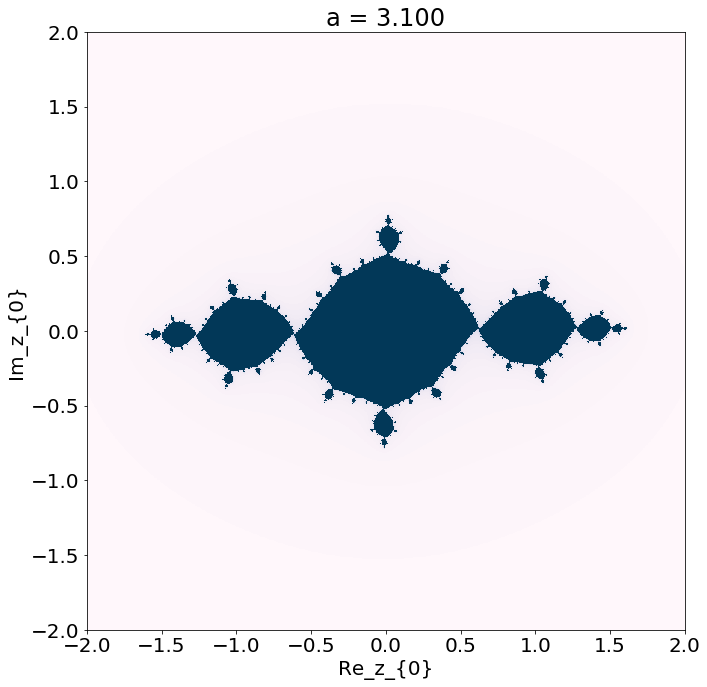

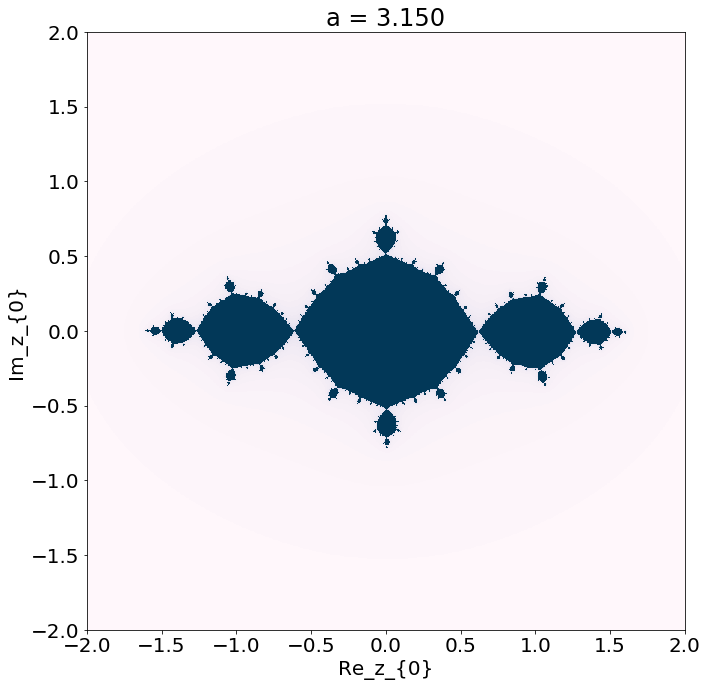

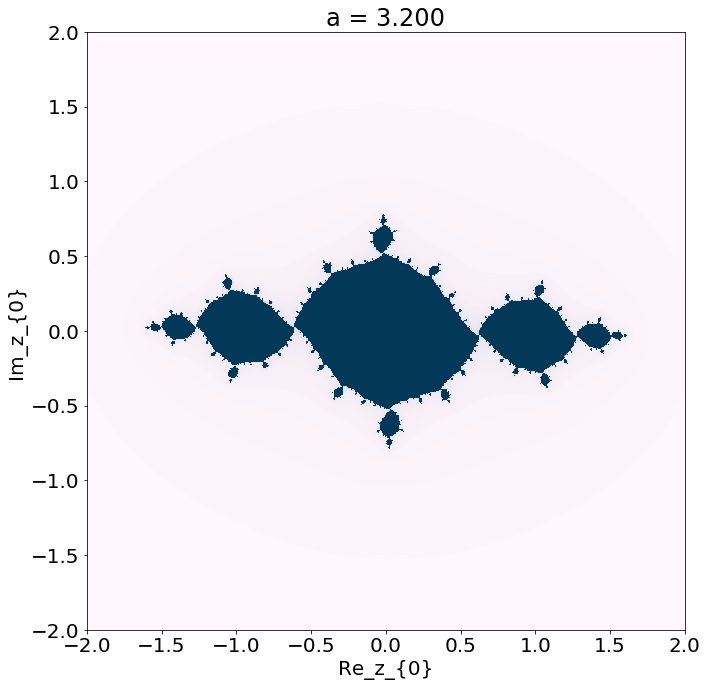

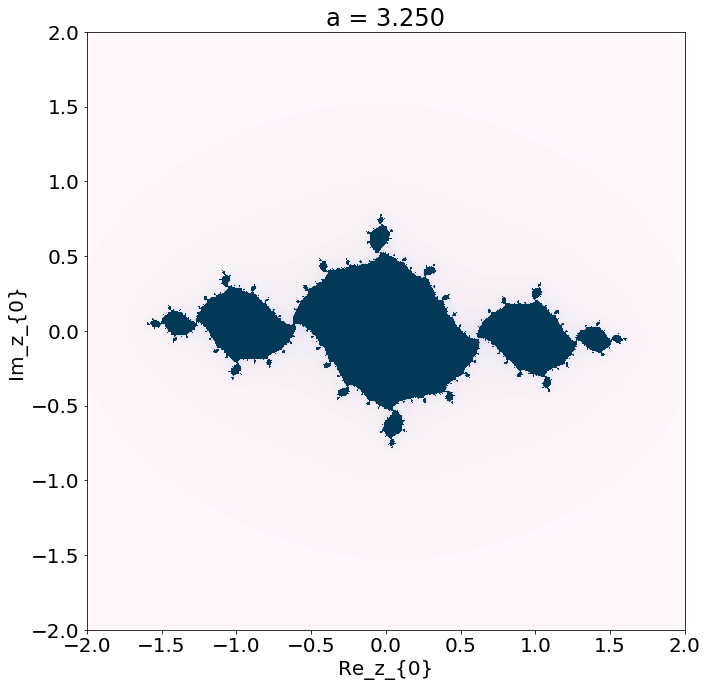

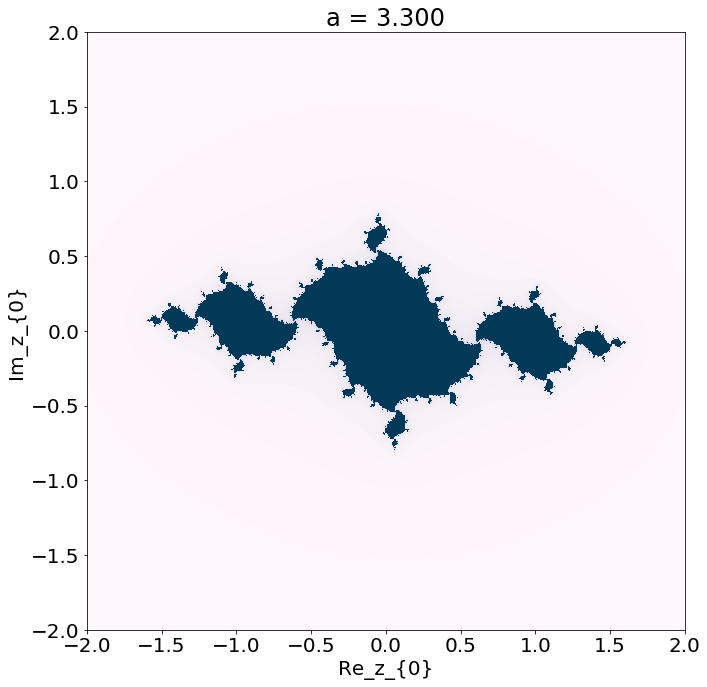

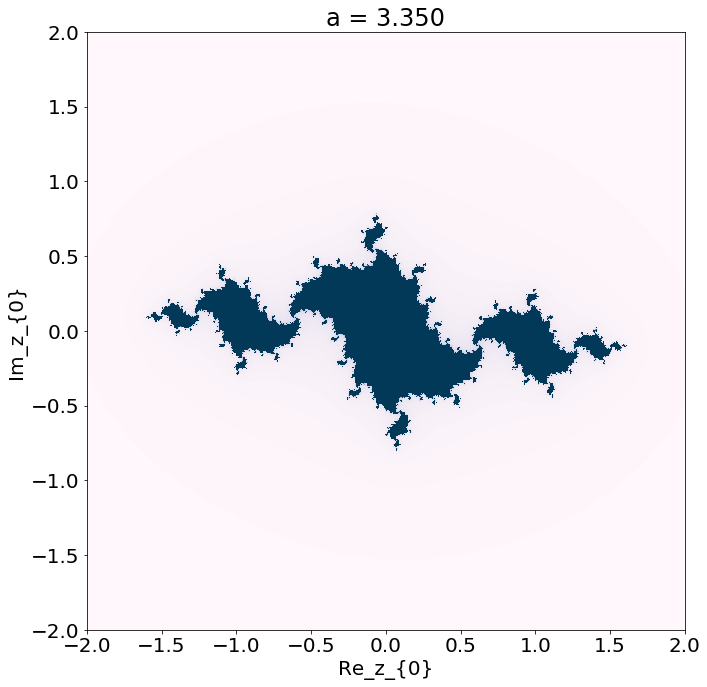

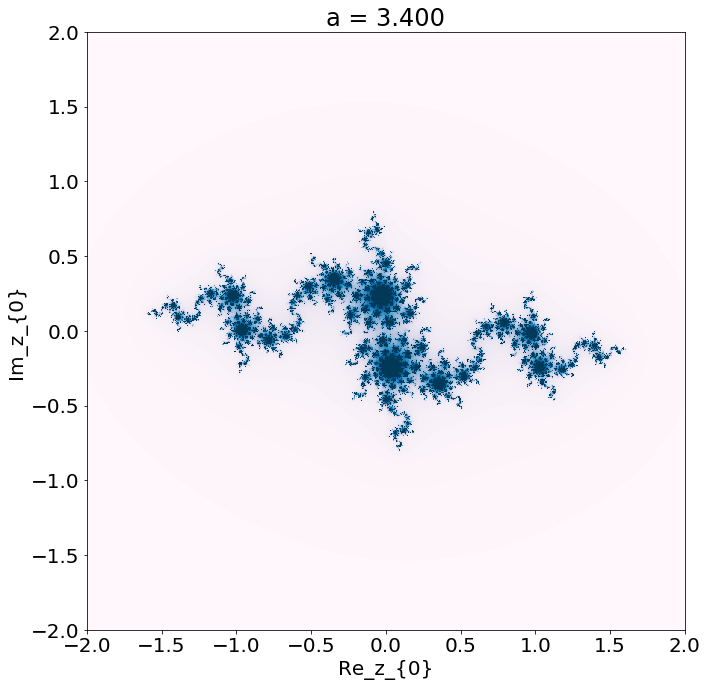

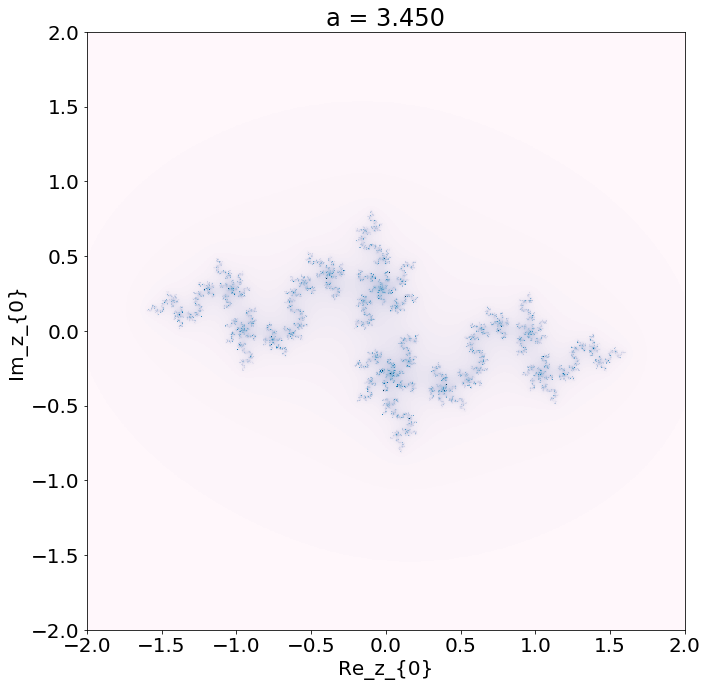

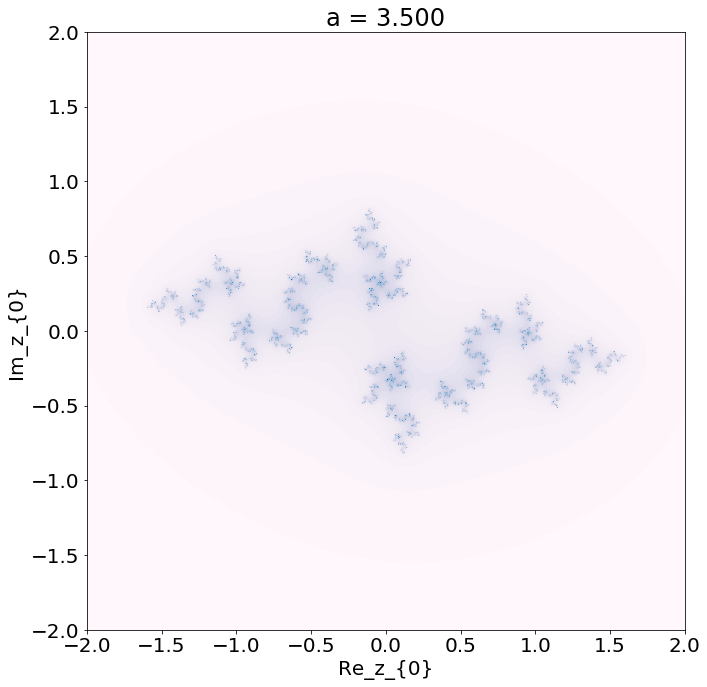

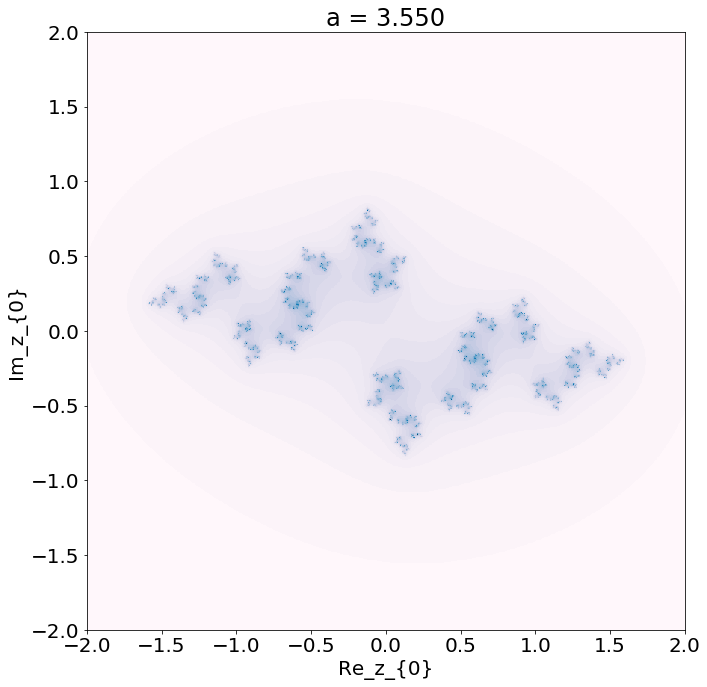

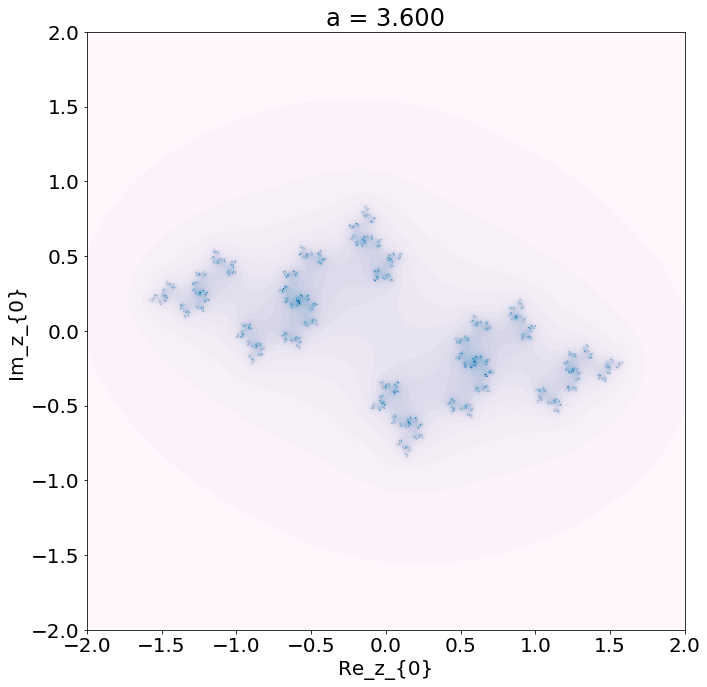

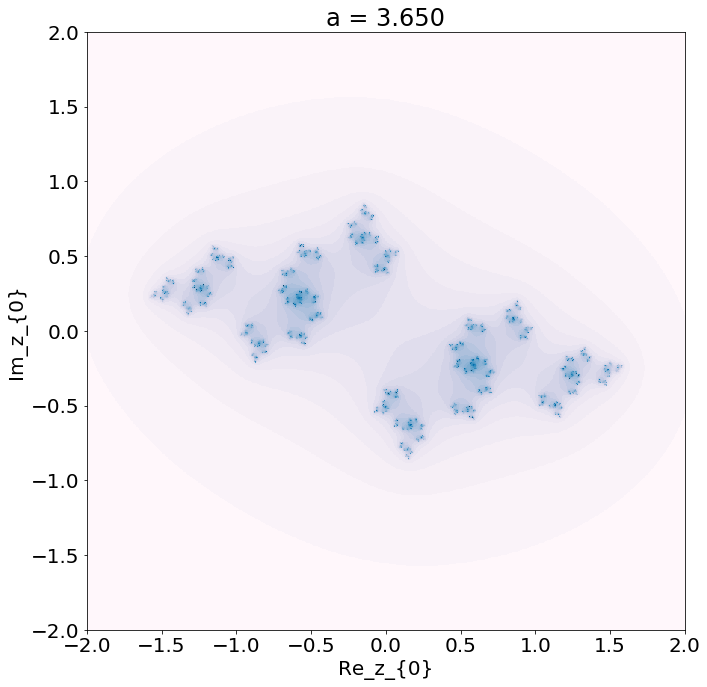

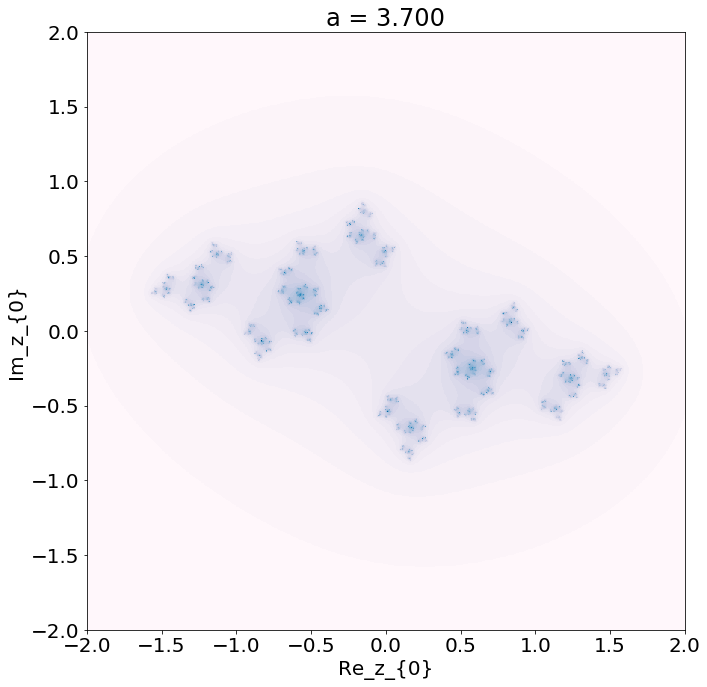

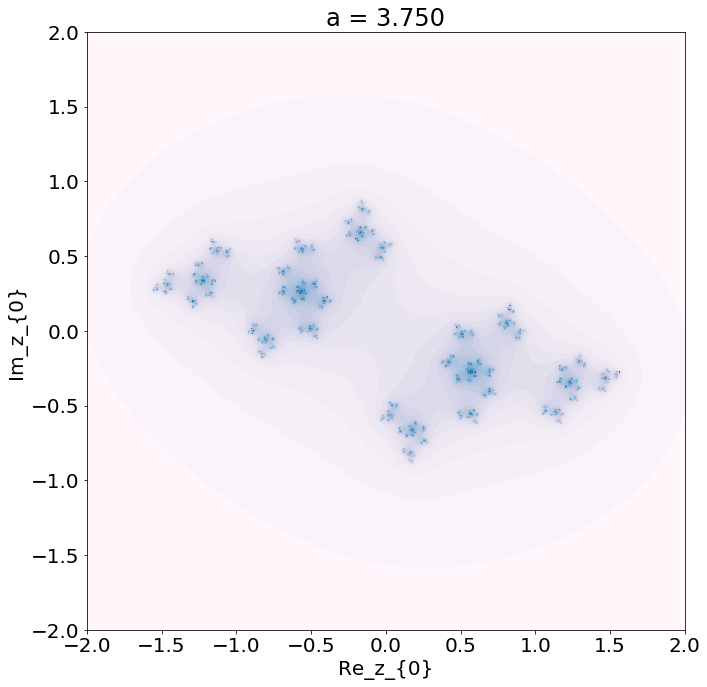

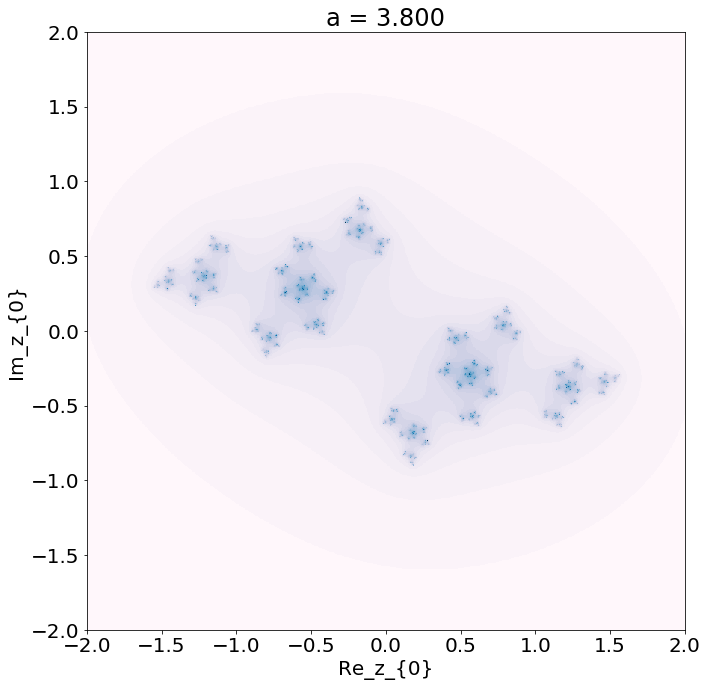

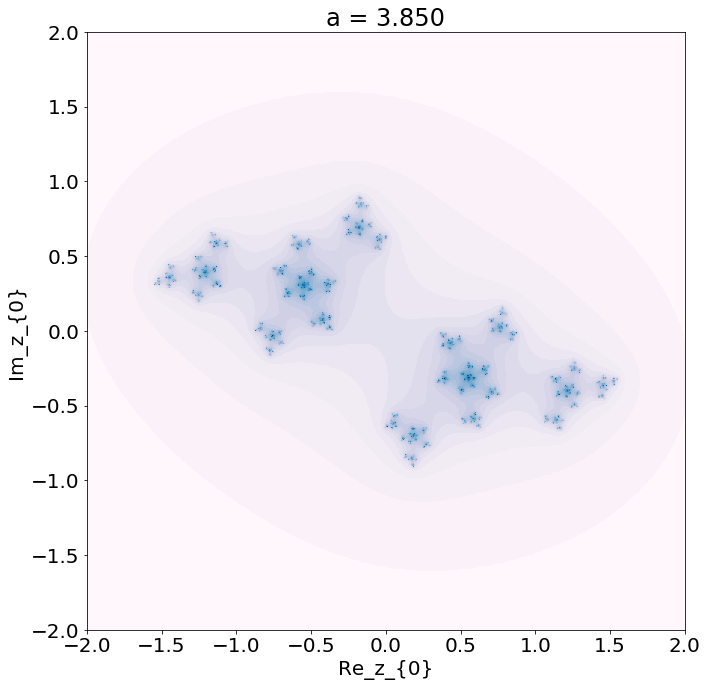

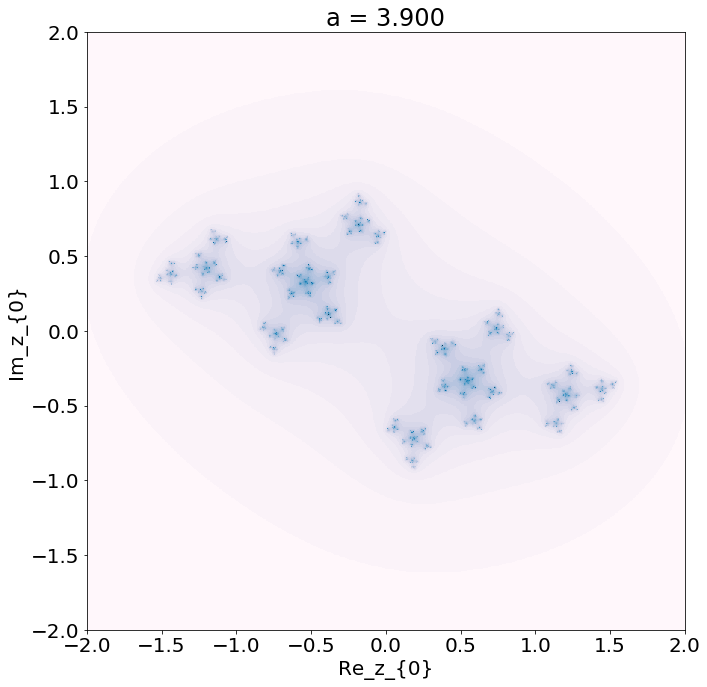

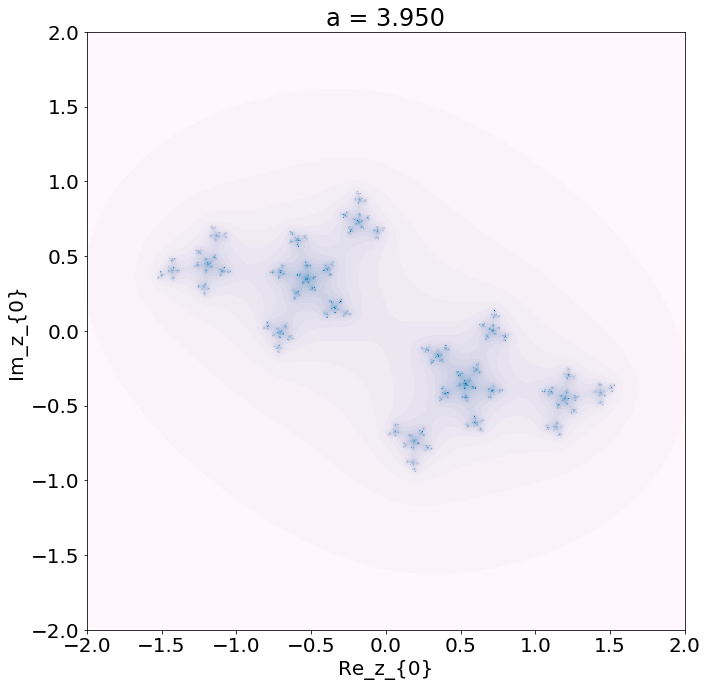

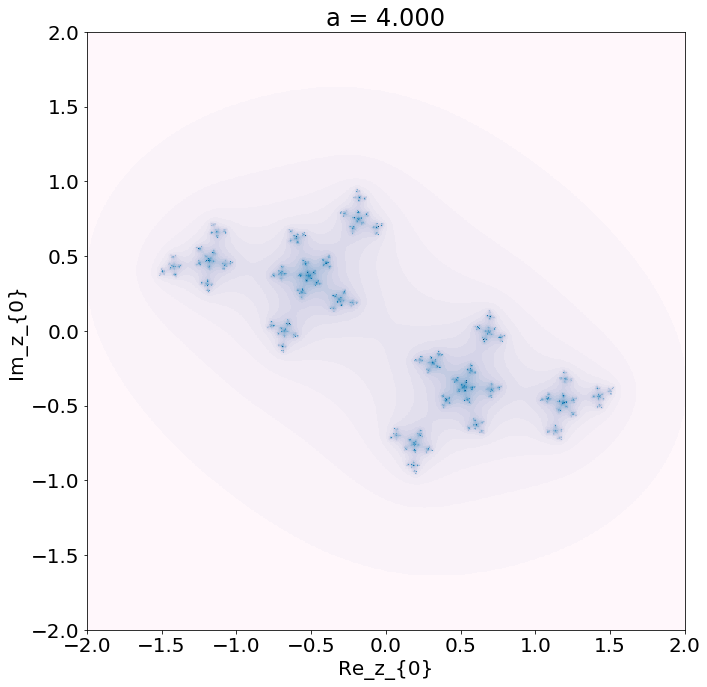

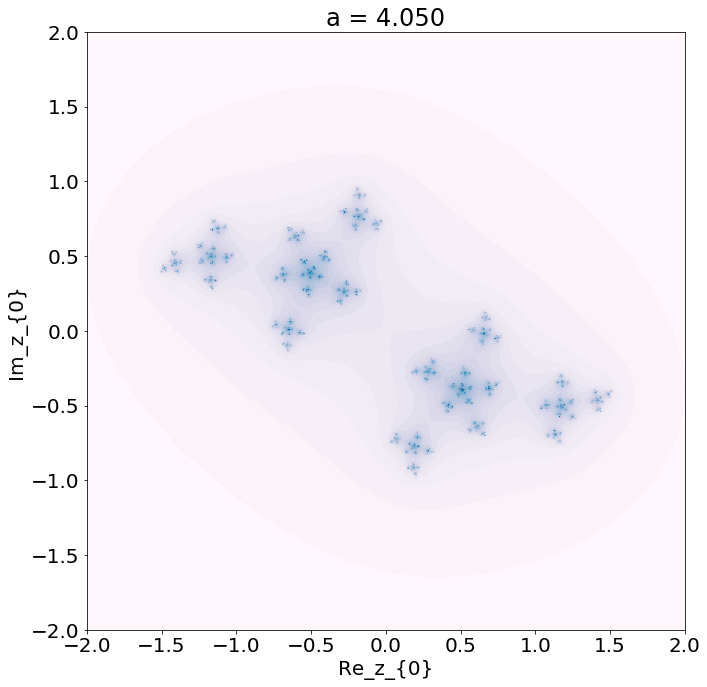

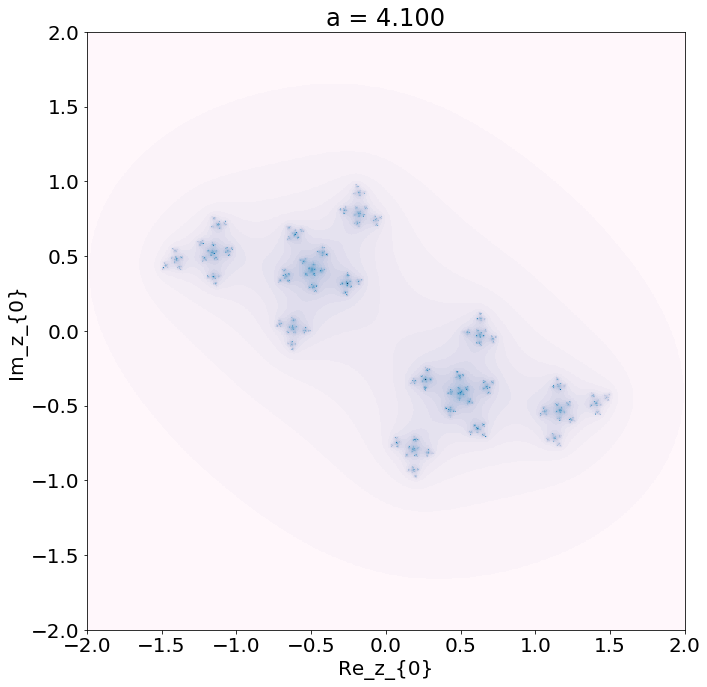

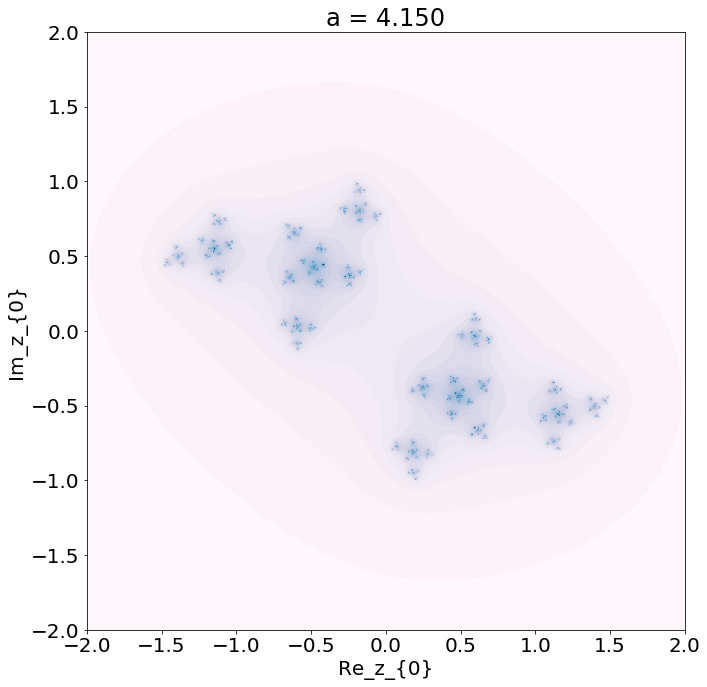

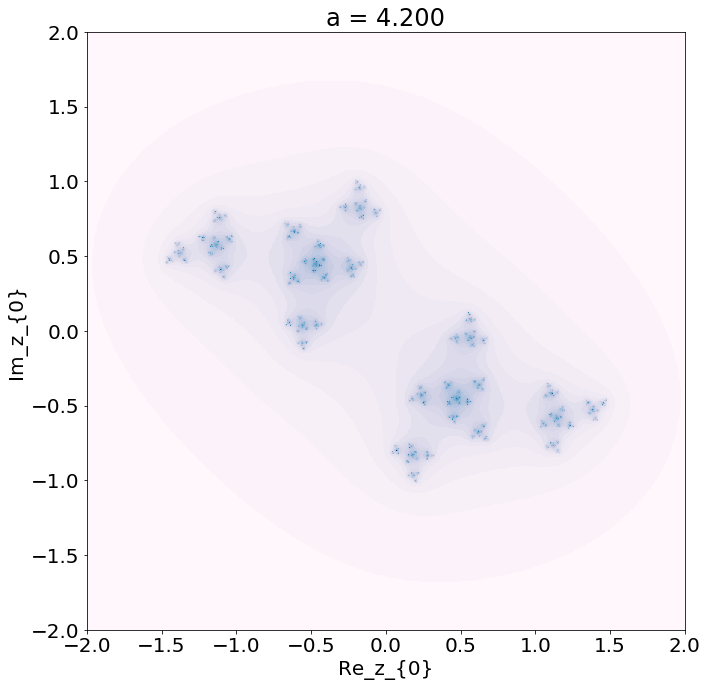

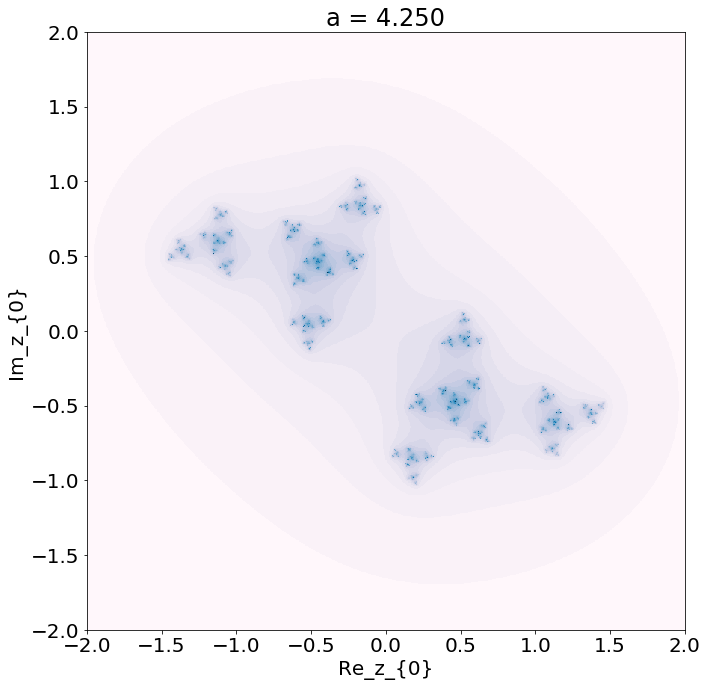

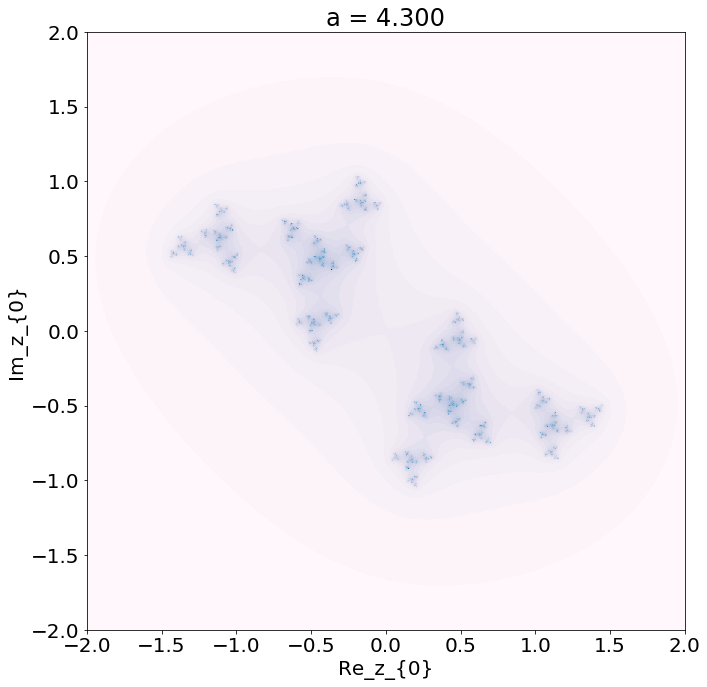

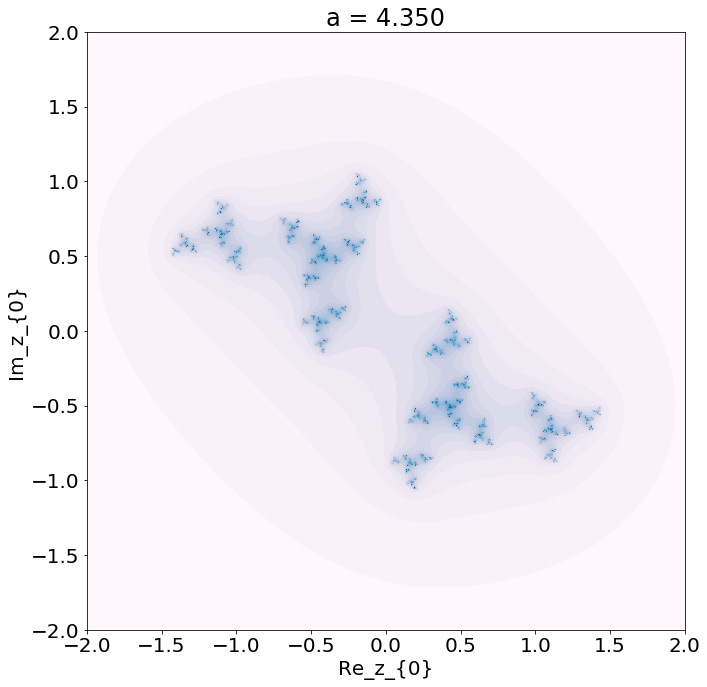

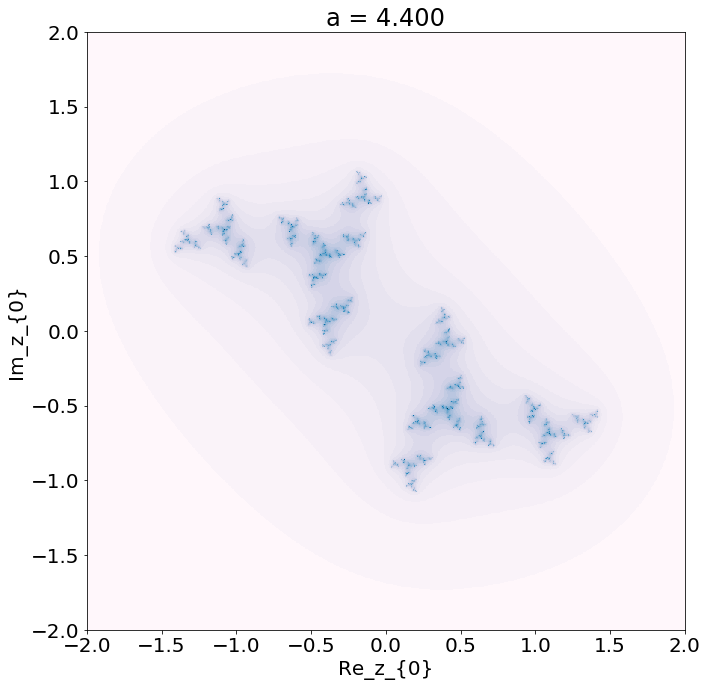

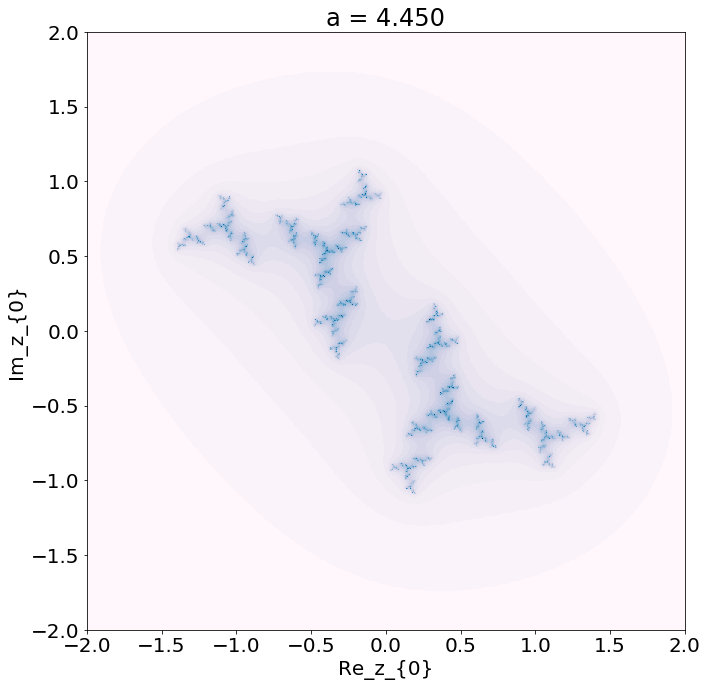

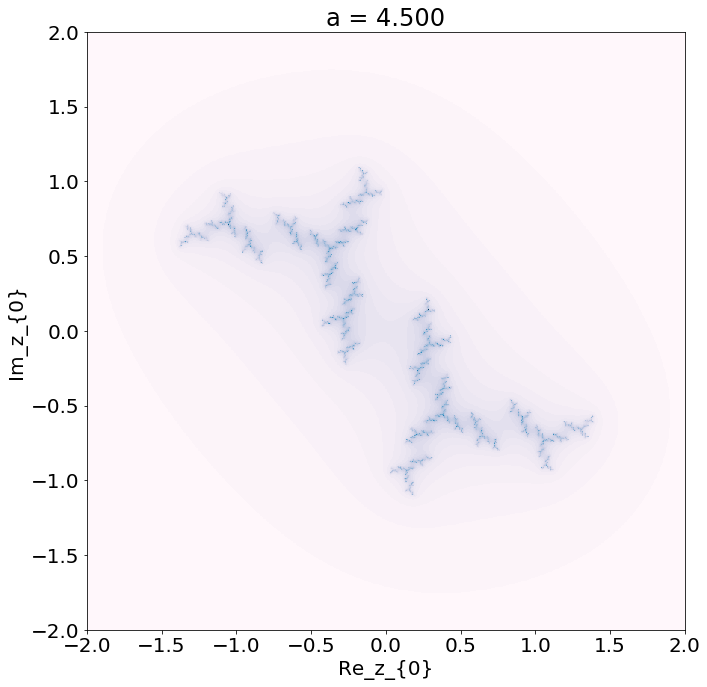

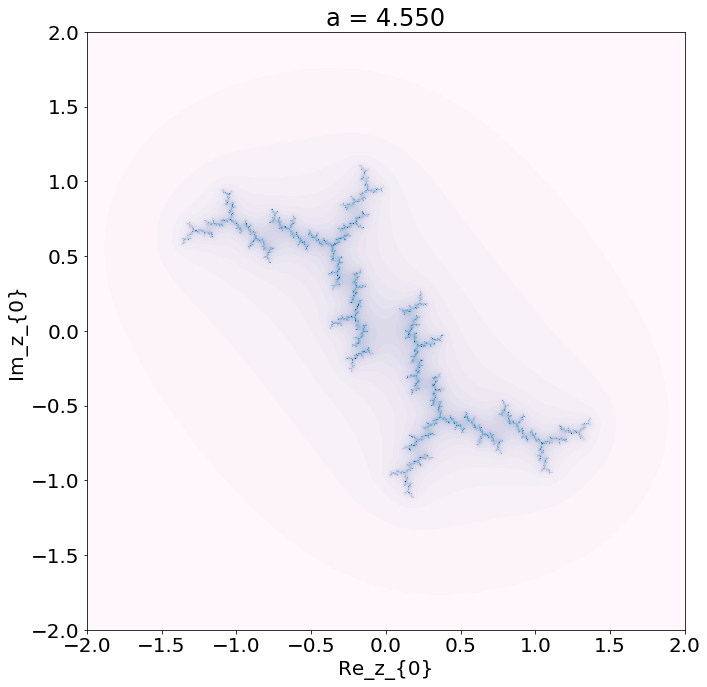

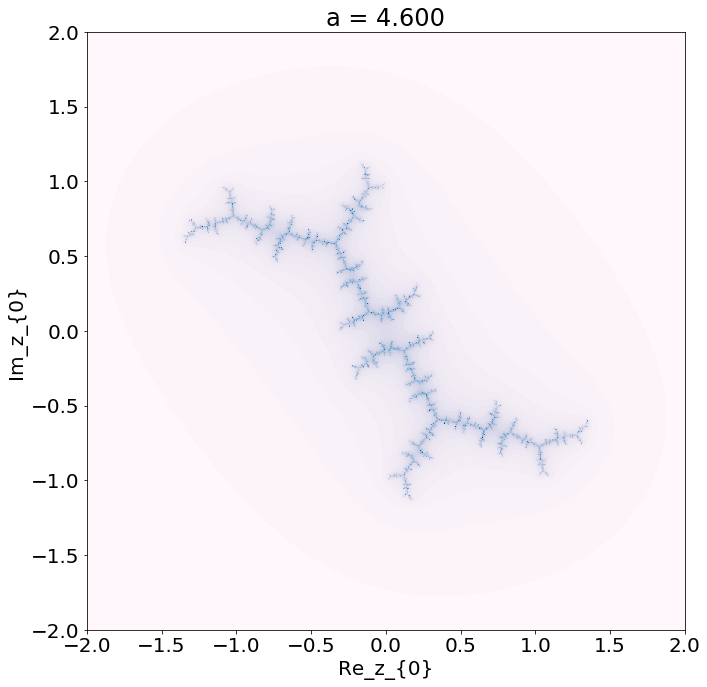

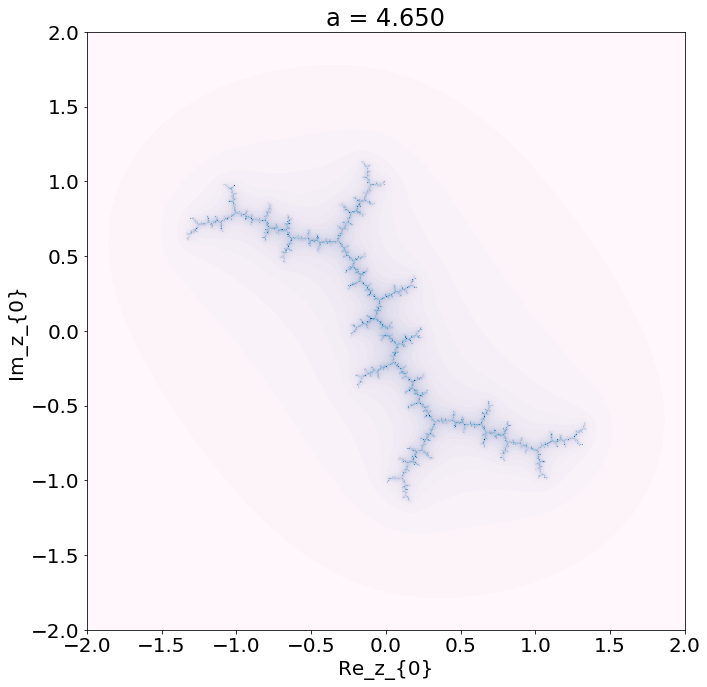

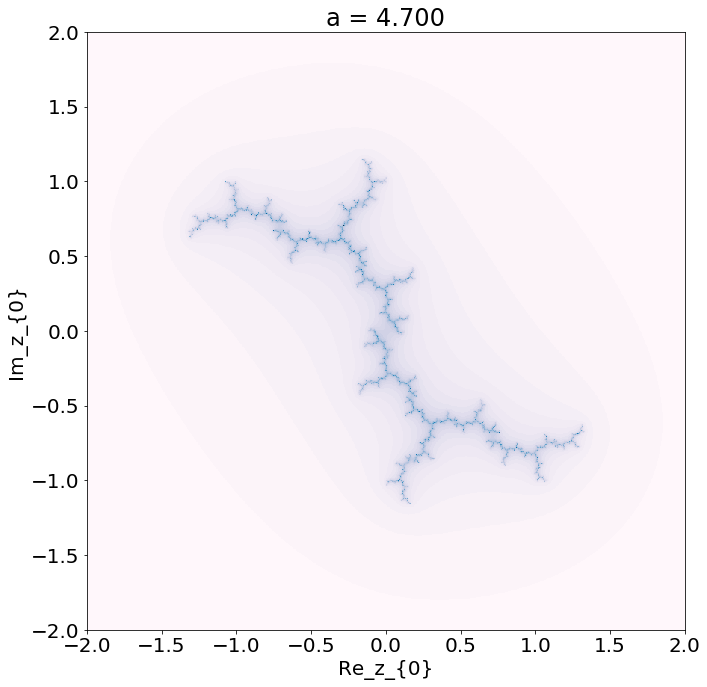

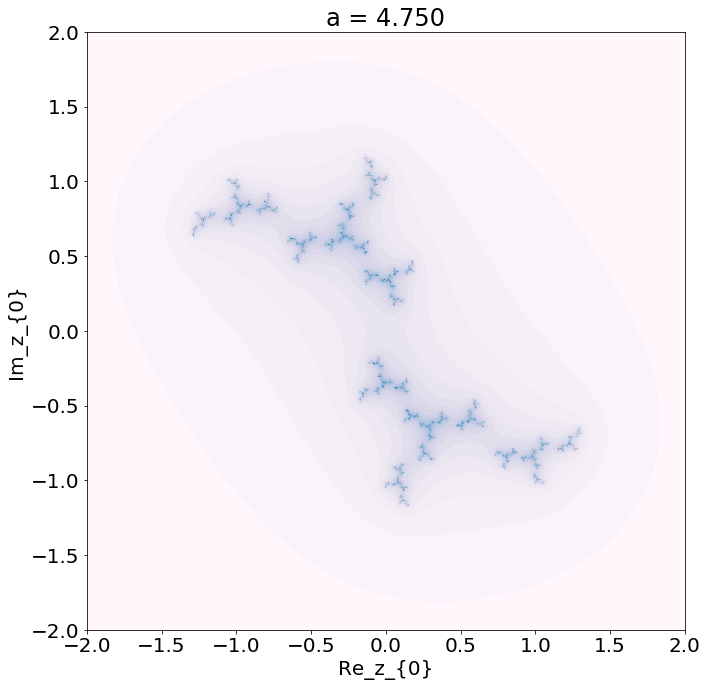

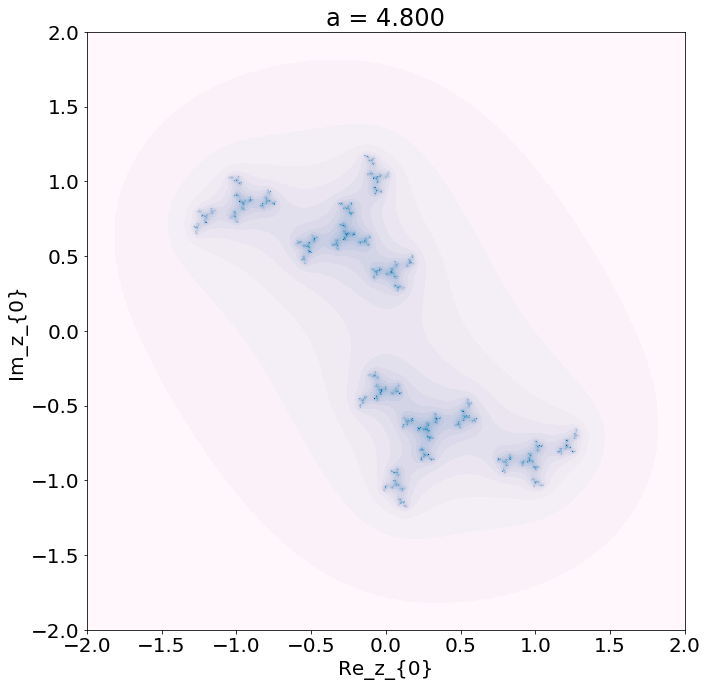

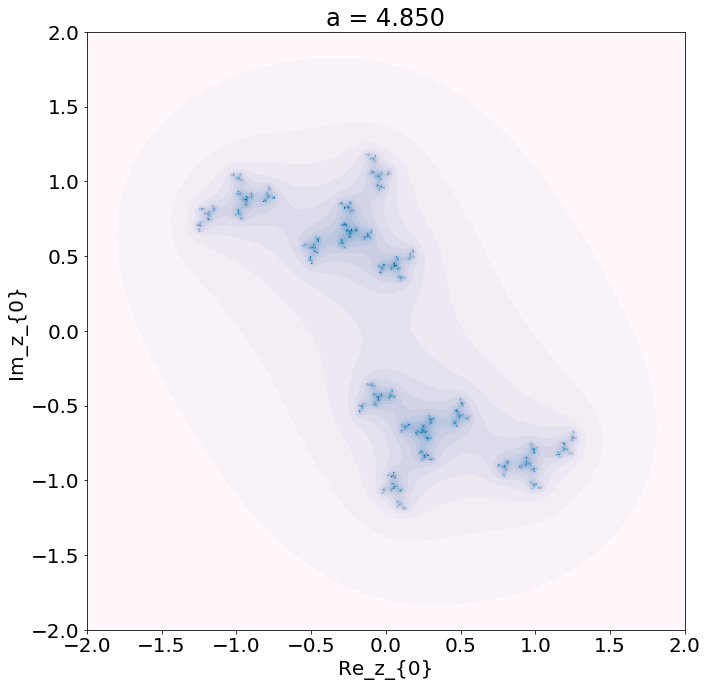

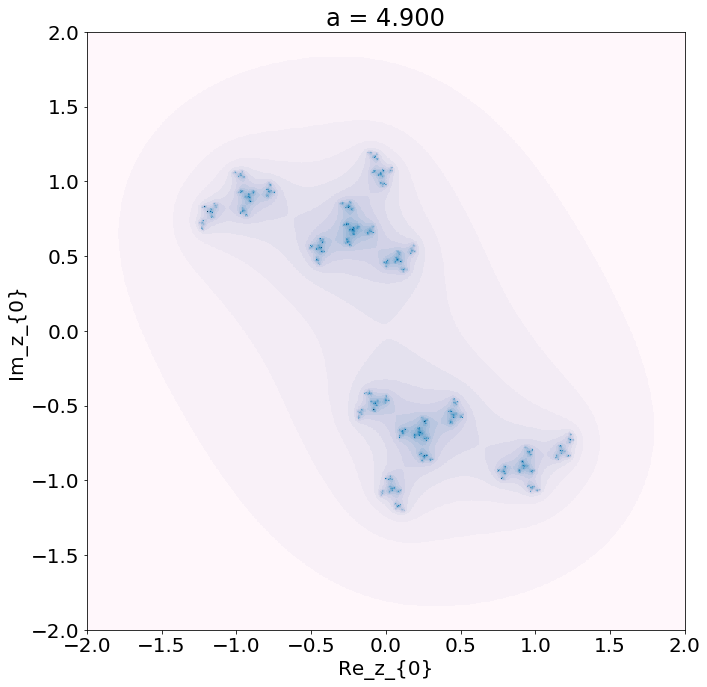

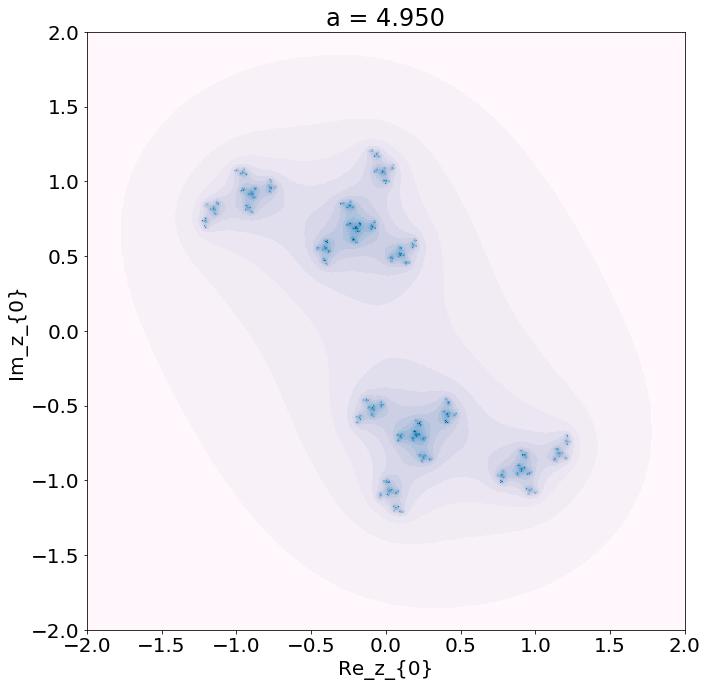

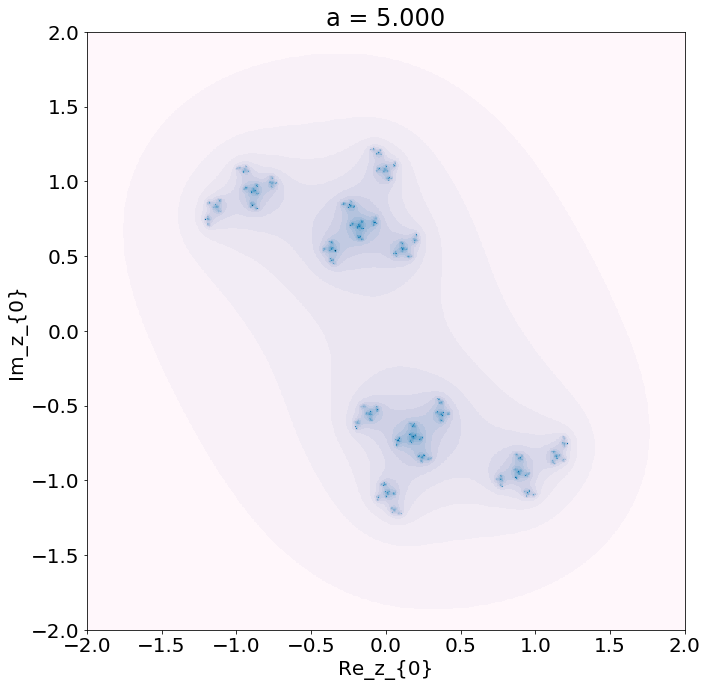

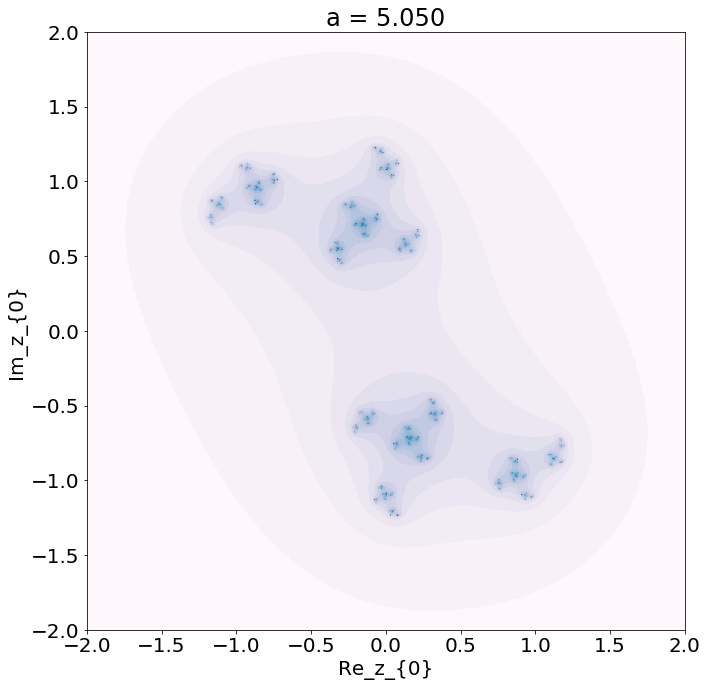

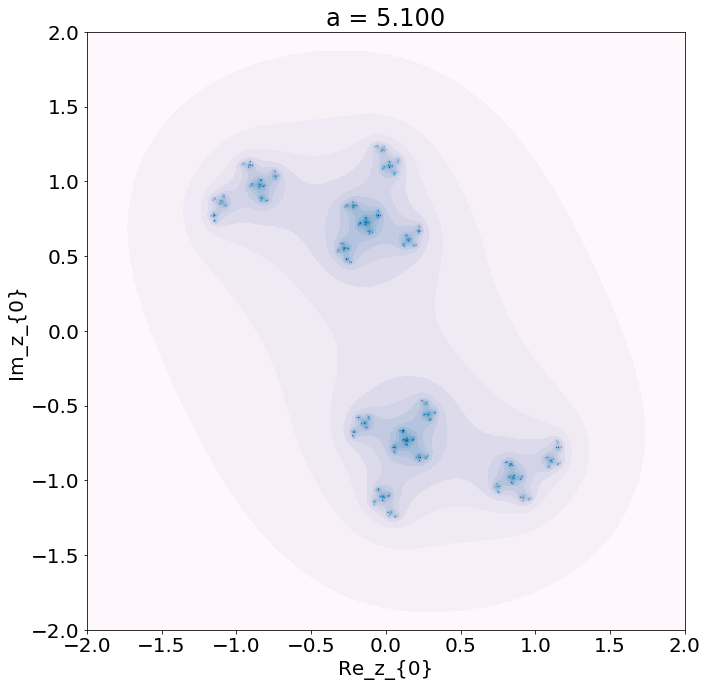

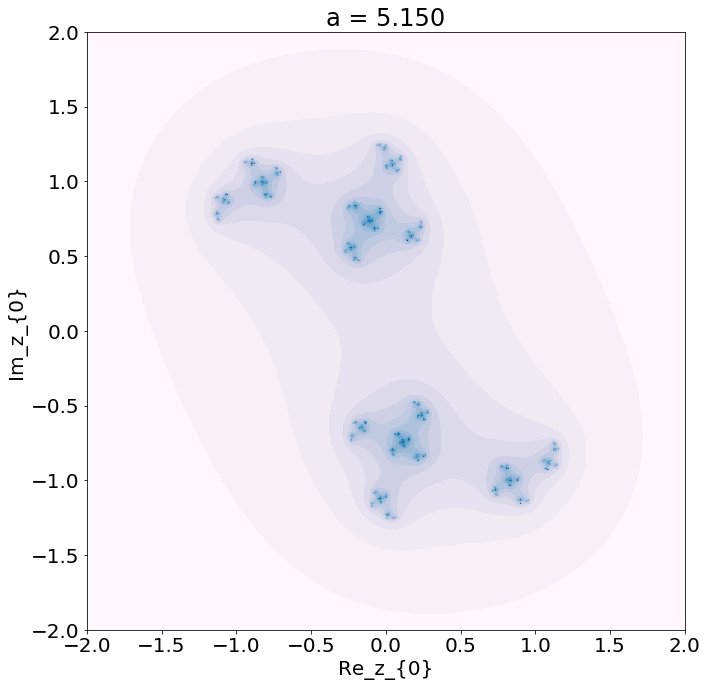

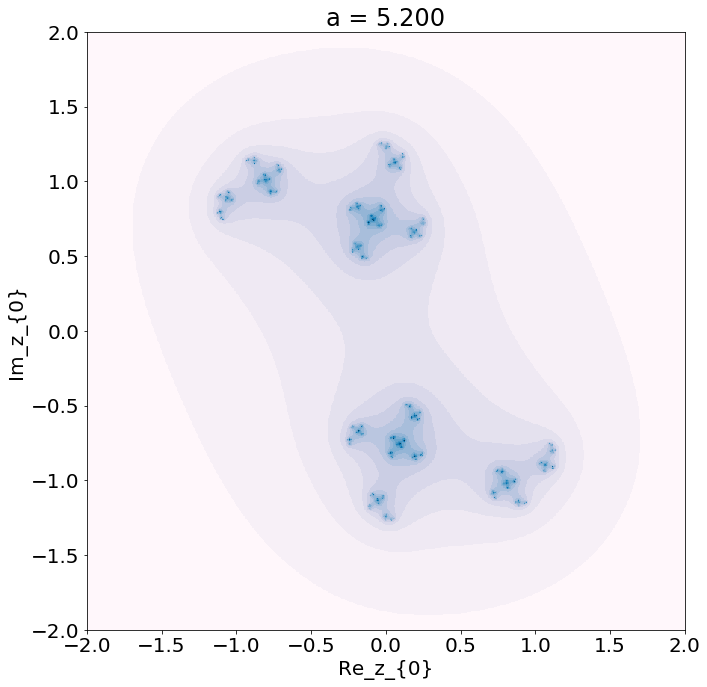

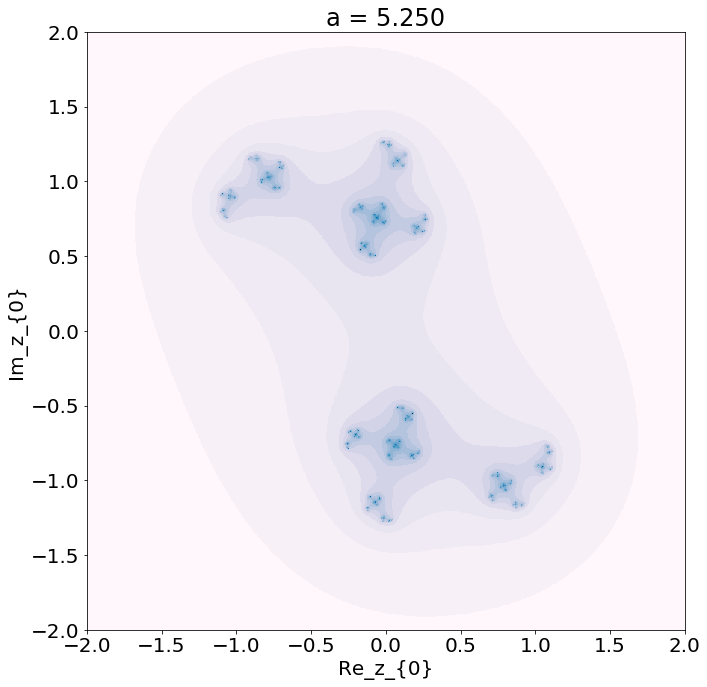

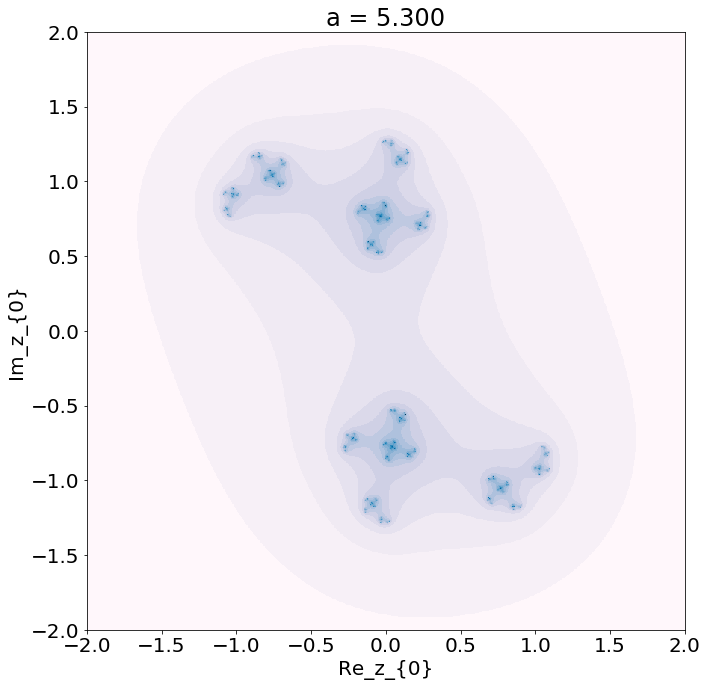

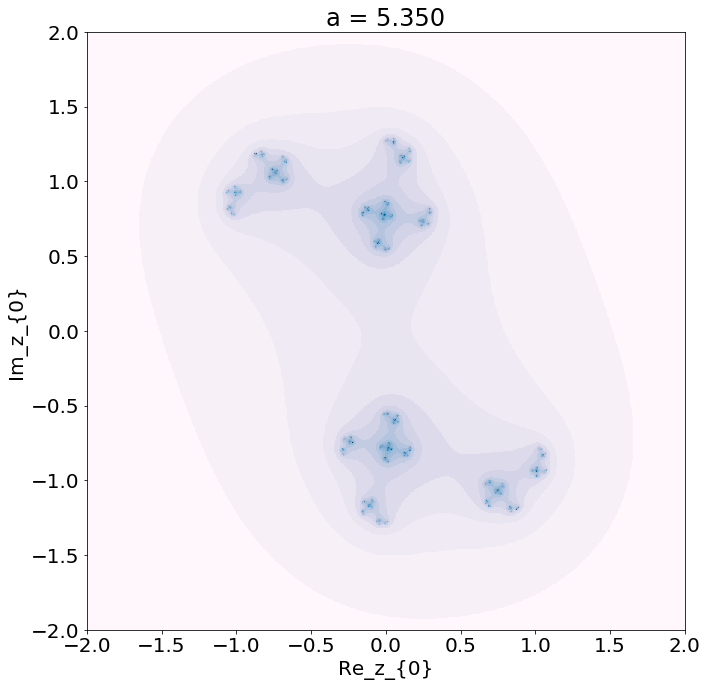

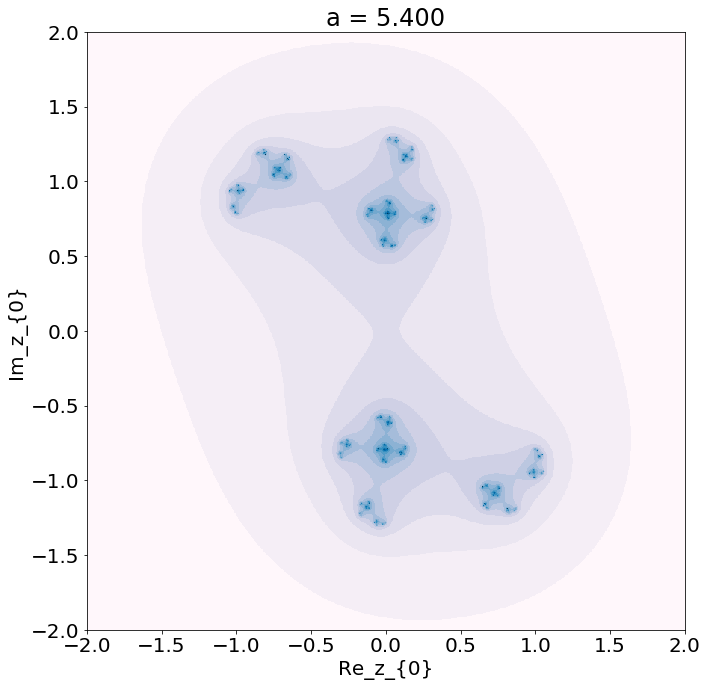

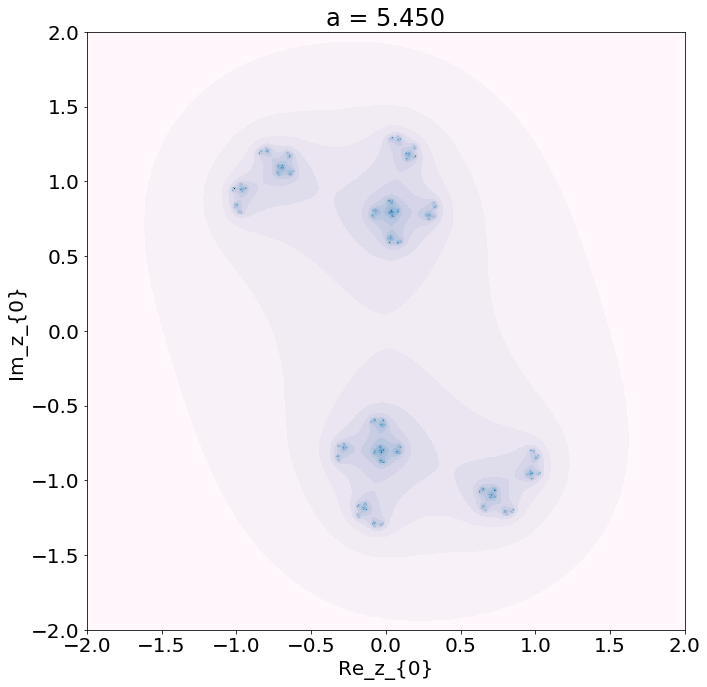

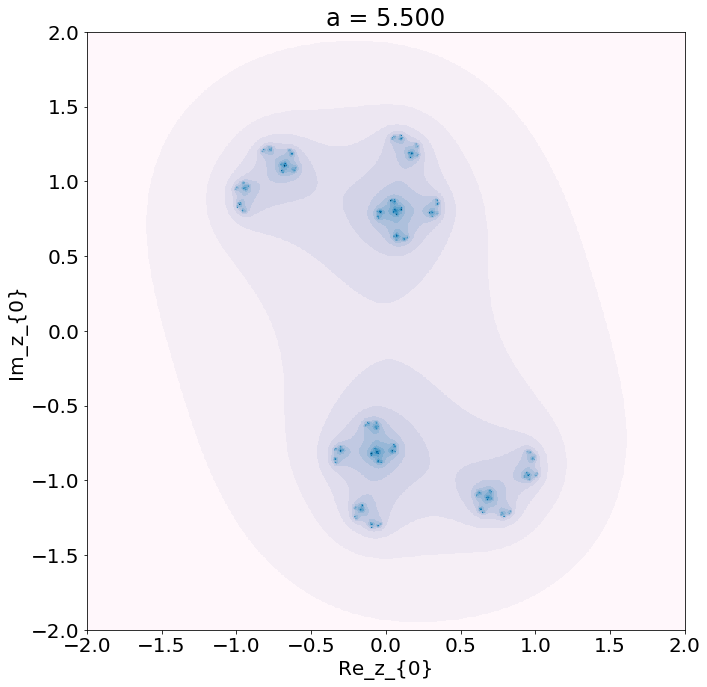

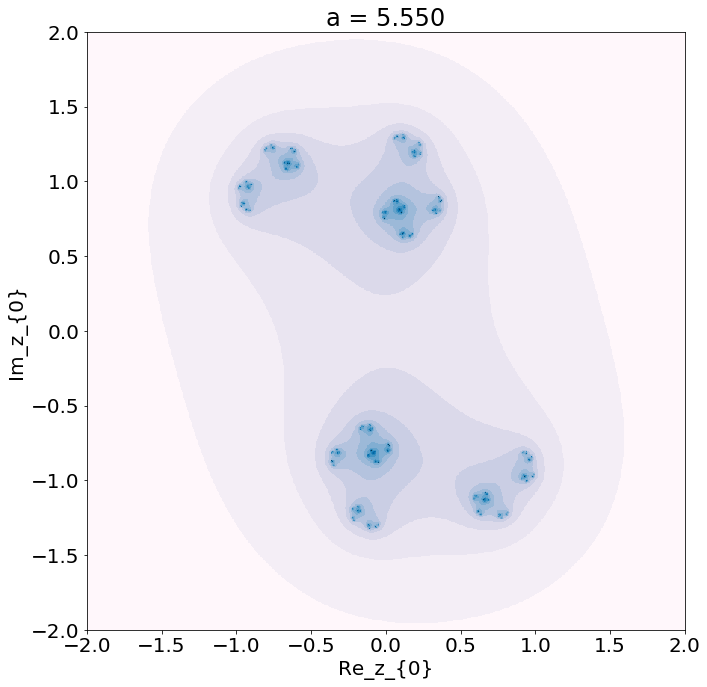

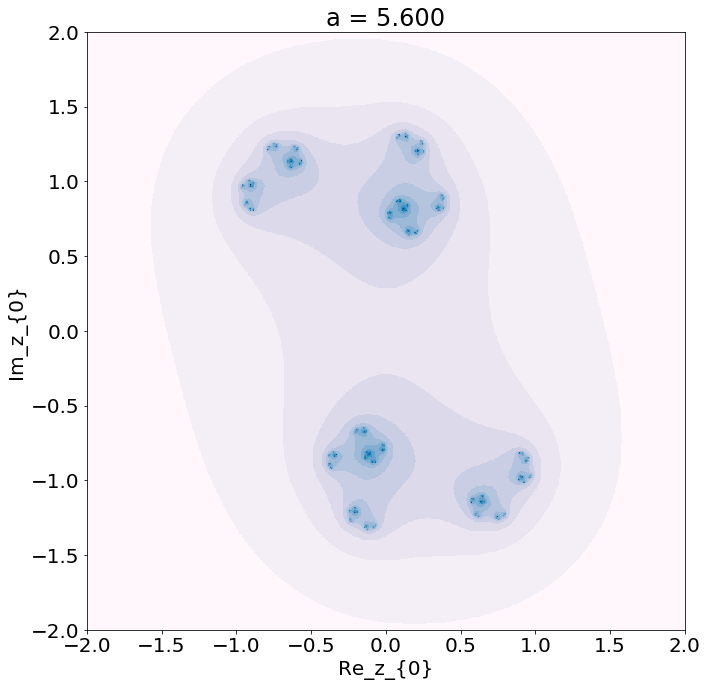

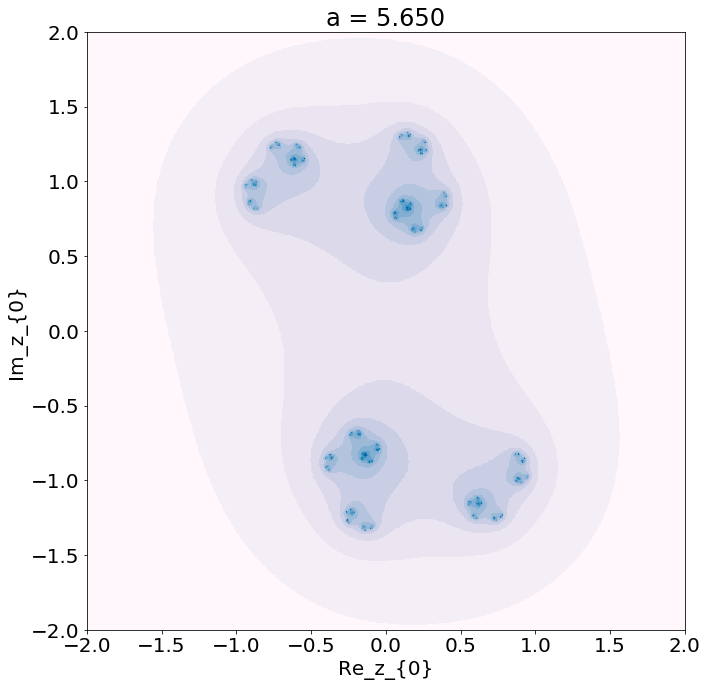

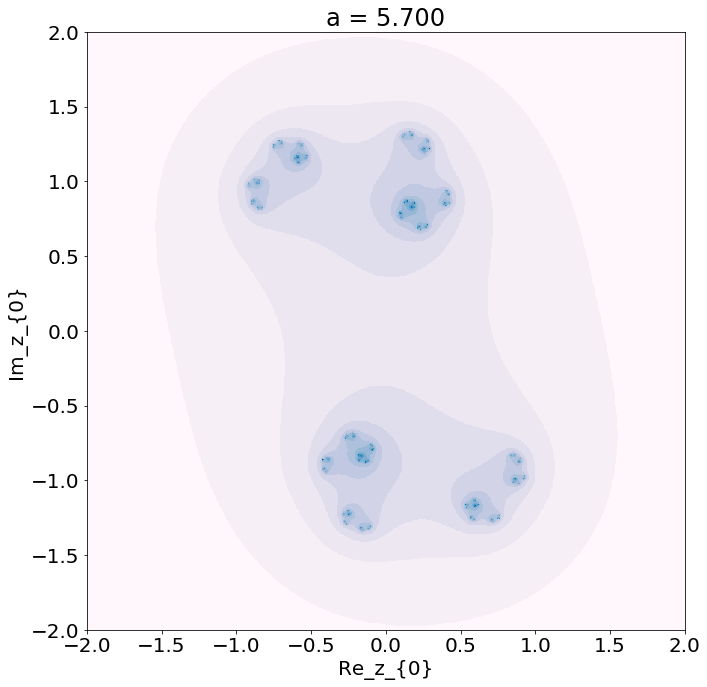

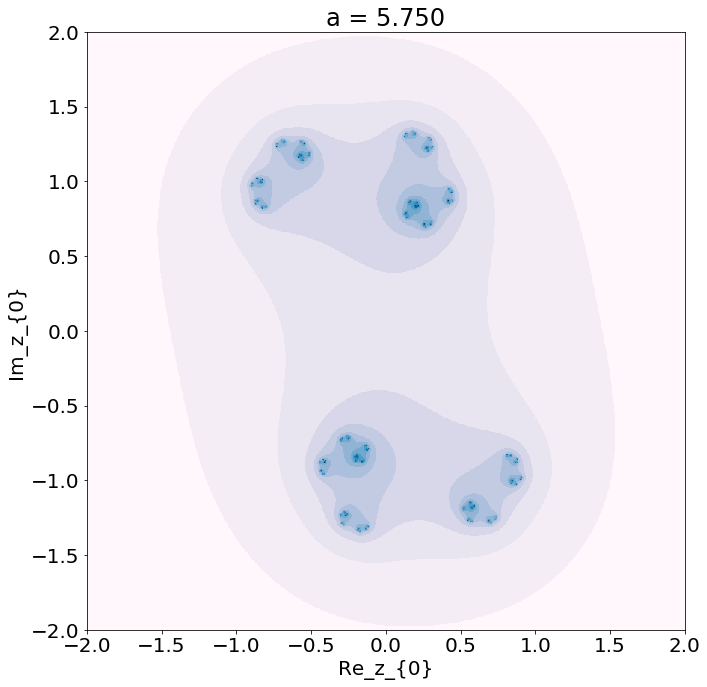

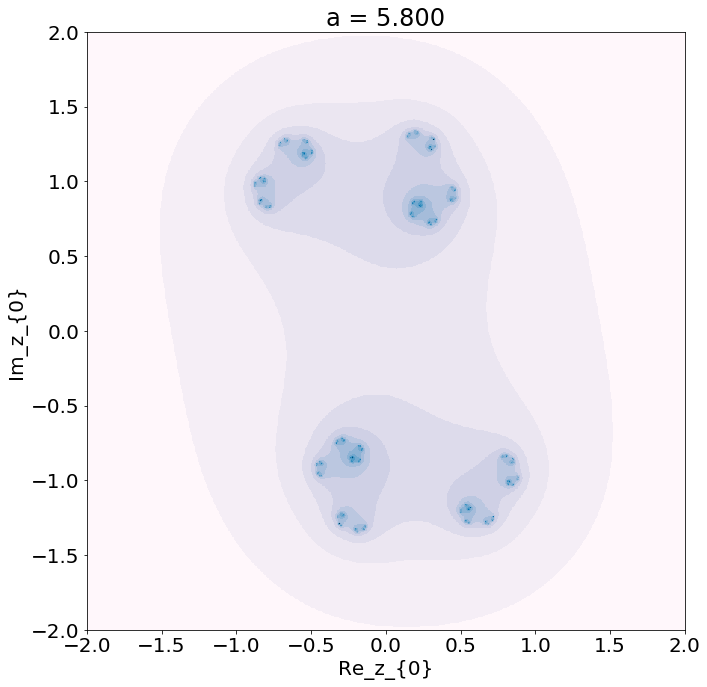

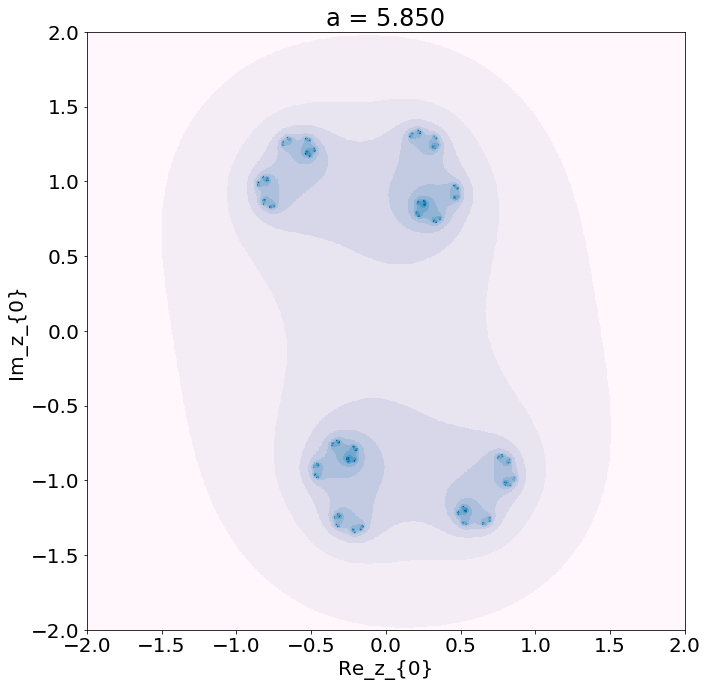

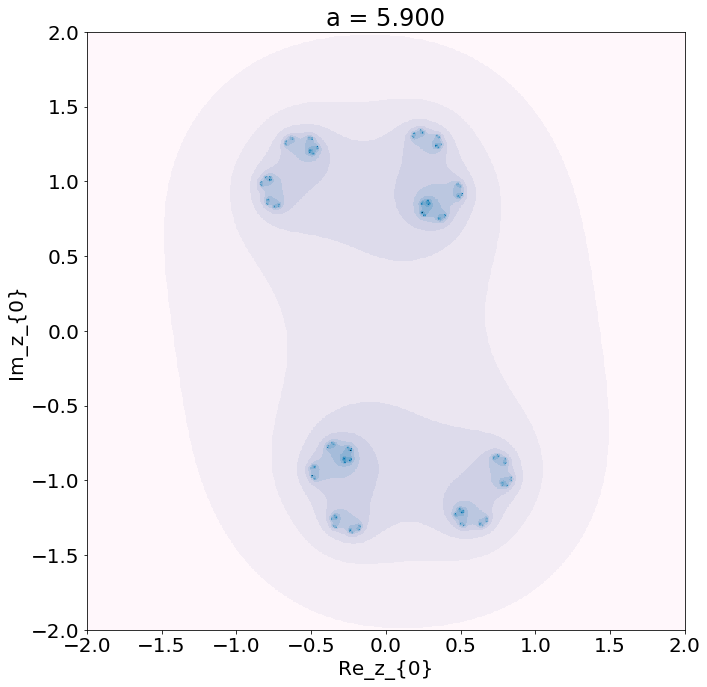

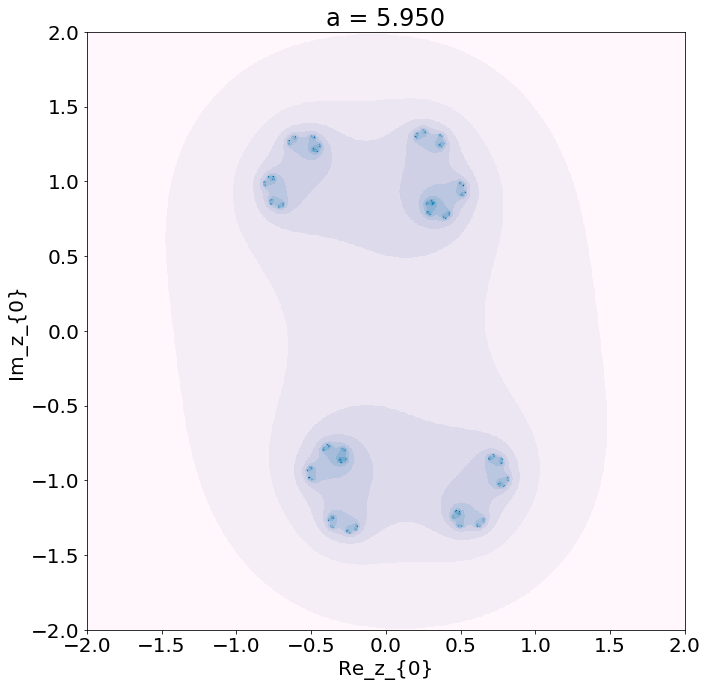

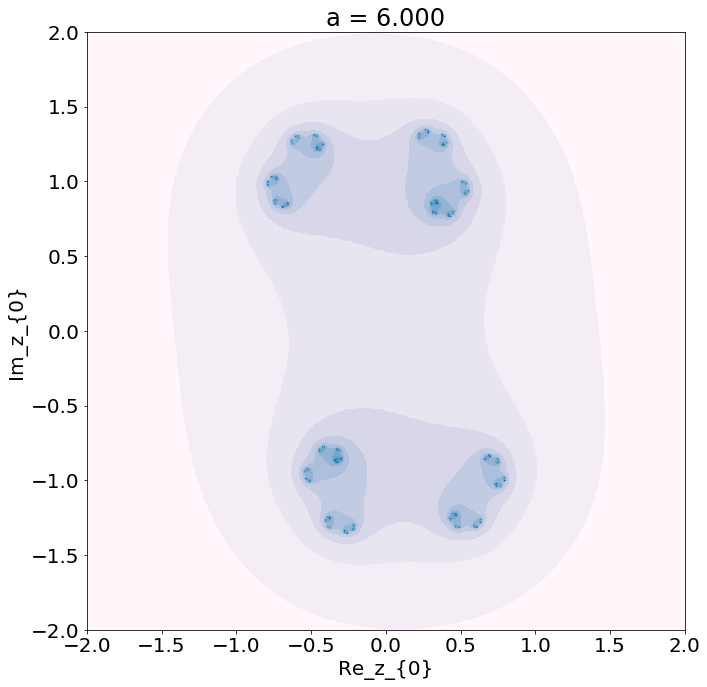

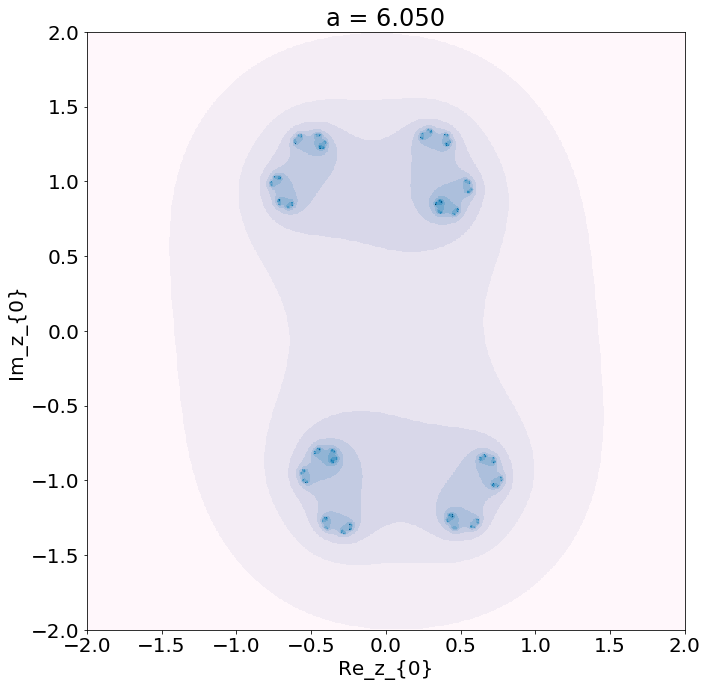

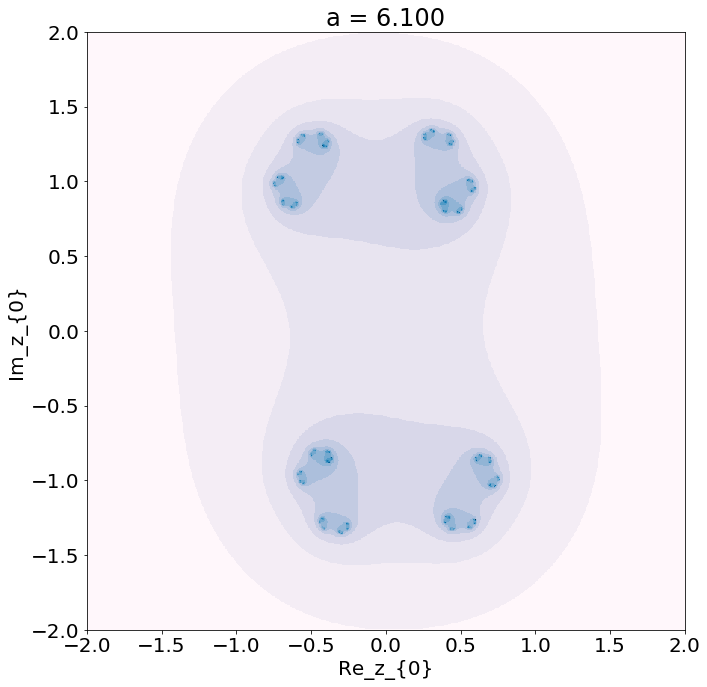

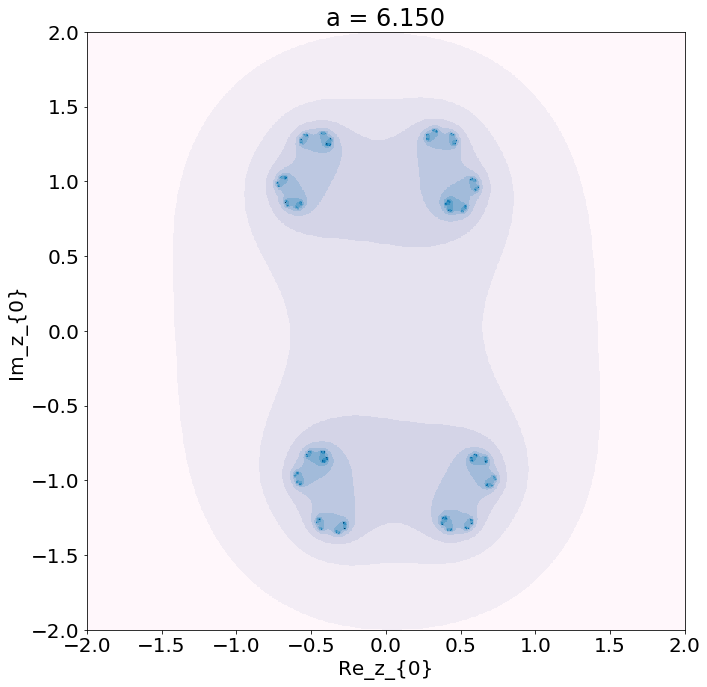

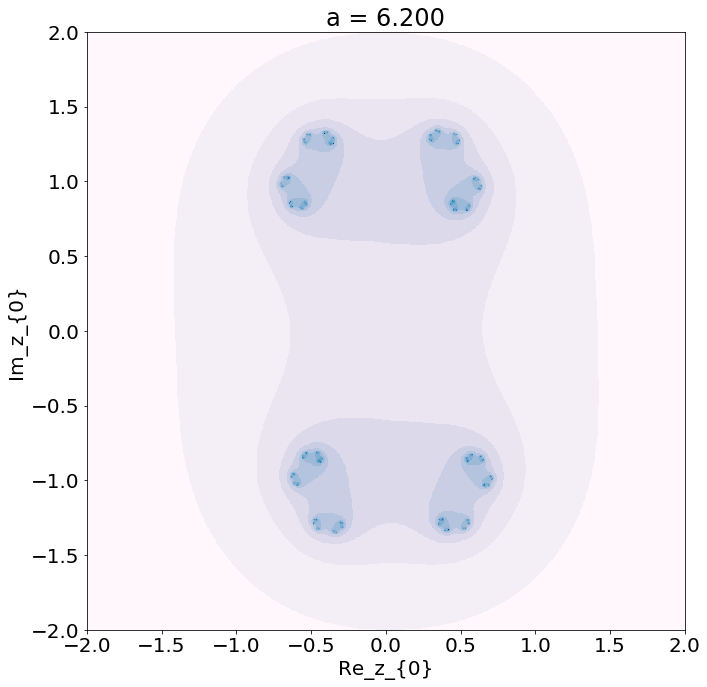

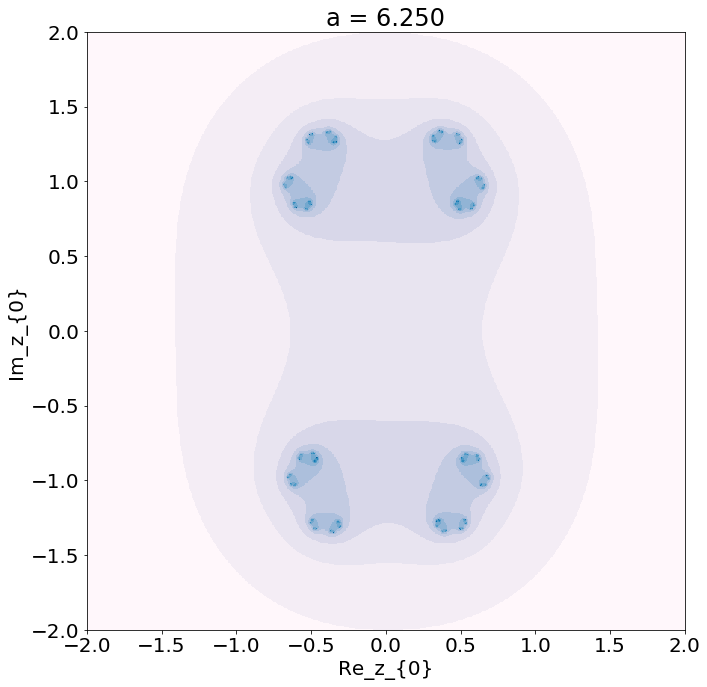

In [7]:
x = y = np.arange(-2.0, 2.0, 0.005)
Z = np.ndarray(shape=[len(x), len(y)])
r = 0

for a in np.arange(0, 2*np.pi, 0.05):
    i = 0
    c = np.exp(1j*a)
    for i, y_0 in enumerate(y):
        for j, x_0 in enumerate(x):
            Z[j][i] = z_next(x_0, y_0, c)

    plt.figure(figsize=(14, 11))
    plt.imshow(Z.T, cmap=cm.PuBu, extent=[-2, 2, -2, 2])
    plt.rcParams.update({'font.size': 20})
    plt.xlabel('Re_z_{0}')
    plt.ylabel('Im_z_{0}')
    name = 'image_' + str(r) + '.png'
    r += 1
    plt.title('a = %.3f' %a)
    plt.savefig('image_' + str(r) + '.png')
    plt.show()

In [8]:
images = []

for r in range (len(np.arange(0, 2*np.pi, 0.05))):
    r += 1
    images.append(Image.open('image_' + str(r) + '.png'))
    
images[0].save('result.gif', save_all=True, append_images=images[1:], optimize=False, duration=480, loop=0)